### 회귀 프로젝트 1 - 차량 가격 예측
- 차량 데이터 세트를 통해 차의 가격을 예측한다.

In [1]:
import pandas as pd

c_df = pd.read_csv('./datasets/cars_for_sale(cleaned).csv')
c_df

,Make,Year,Condition,Mileage,Price,Seller Rating,Seller Rating Count,Interior color,Drivetrain,Min MPG,...,1-owner vehicle,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,Lexus,2024,New,0.0,112865.0,4.7,1261.0,Black,Rear-wheel Drive,15.0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Acura,2007,Used,61110.0,11295.0,4.2,440.0,–,Front-wheel Drive,22.0,...,True,True,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,McLaren,2016,Used,6305.0,219997.0,3.1,421.0,Carbon Black,Rear-wheel Drive,NaN,...,False,False,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
3,Audi,2016,Used,65715.0,23999.0,3.6,123.0,Black,All-wheel Drive,23.0,...,False,True,True,0,3.0,5.0,5.0,5.0,5.0,5.0
4,BMW,2018,Used,19830.0,39799.0,4.4,91.0,Black,All-wheel Drive,0.0,...,True,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9011,Jeep,2024,New,10.0,52301.0,4.0,54.0,Global Black,Four-wheel Drive,18.0,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9012,BMW,2022,Used,48804.0,27979.0,4.8,3739.0,Canberra Beige,All-wheel Drive,21.0,...,True,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
9013,GMC,2024,New,3.0,51080.0,4.5,3896.0,Black,Four-wheel Drive,17.0,...,NaN,NaN,NaN,0,5.0,5.0,5.0,4.0,5.0,5.0
9014,GMC,2012,Used,146694.0,8995.0,NaN,NaN,Jet Black,All-wheel Drive,20.0,...,False,True,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9016 entries, 0 to 9015
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 9016 non-null   object 
 1   Year                 9016 non-null   int64  
 2   Condition            9016 non-null   object 
 3   Mileage              8867 non-null   float64
 4   Price                9016 non-null   float64
 5   Seller Rating        7661 non-null   float64
 6   Seller Rating Count  7661 non-null   float64
 7   Interior color       9016 non-null   object 
 8   Drivetrain           9016 non-null   object 
 9   Min MPG              7421 non-null   float64
 10  Max MPG              7421 non-null   float64
 11  Fuel type            8441 non-null   object 
 12  Engine Size (L)      8251 non-null   float64
 13  Accidents or damage  5400 non-null   float64
 14  1-owner vehicle      5374 non-null   object 
 15  Personal use only    5400 non-null   o

In [3]:
c_df.Make.value_counts()

Make
Ford             847
Jeep             809
Chevrolet        807
Nissan           593
BMW              467
Mercedes-Benz    447
Subaru           395
Honda            384
Toyota           371
Audi             322
Cadillac         313
Lexus            293
Volkswagen       284
Kia              277
RAM              227
INFINITI         206
Hyundai          191
Dodge            150
Tesla            145
Lincoln          137
Volvo            116
GMC              115
Mazda            110
Chrysler         103
Buick            101
Porsche          101
Acura            100
Jaguar            64
Mitsubishi        58
Land              54
Ferrari           45
MINI              44
Genesis           43
Maserati          41
Alfa              31
Scion             29
Aston             25
Rivian            25
Rolls-Royce       23
Lamborghini       21
Pontiac           15
Saab              13
Bentley           13
Saturn            10
Polestar           8
McLaren            8
Hummer             7
Oldsmobi

#### 제작사 별 차량의 수를 시각화

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


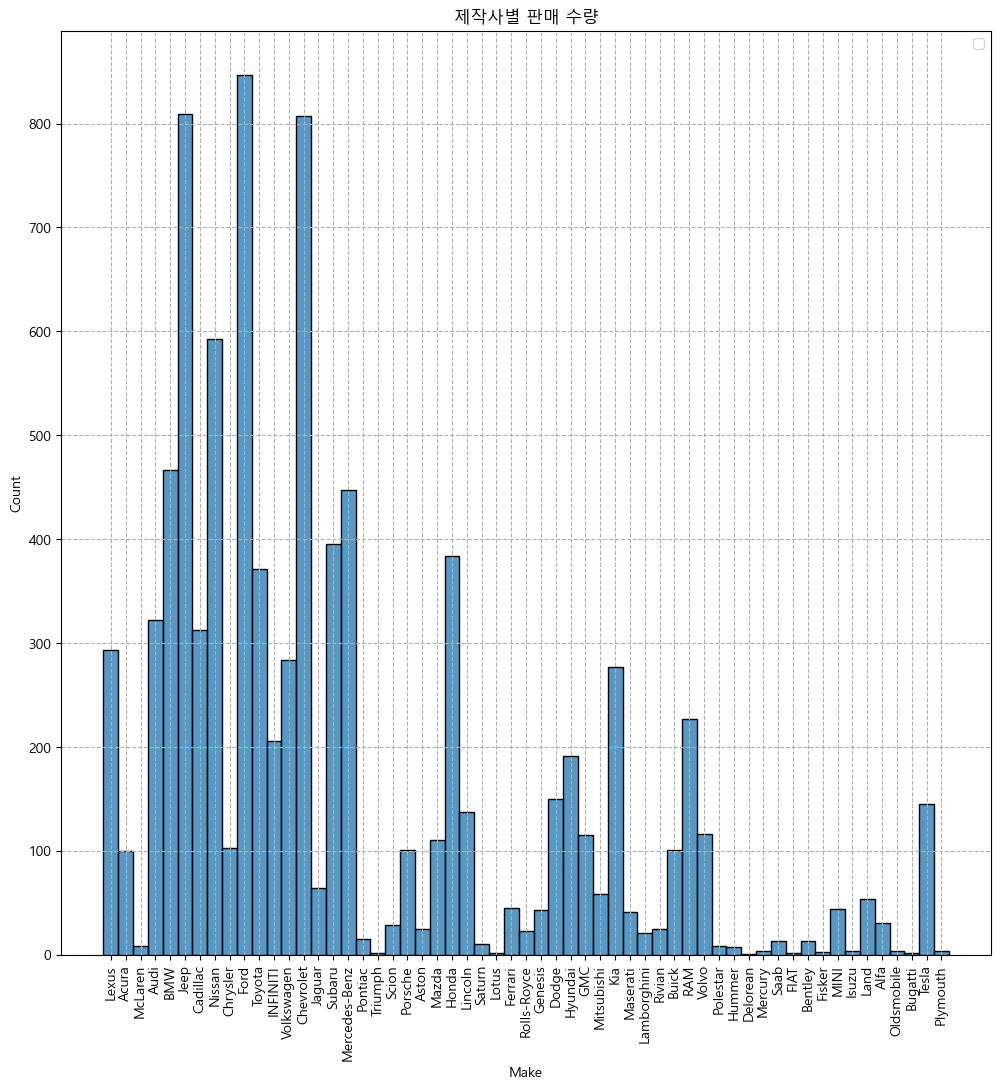

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12,12))
sns.histplot(x='Make', data=c_df)
plt.xticks(rotation=90)
plt.grid(visible=True, linestyle='--')
plt.legend()
plt.title('제작사별 판매 수량')
plt.show()

결측치 확인

In [5]:
c_df.isna().sum()

Make                      0
Year                      0
Condition                 0
Mileage                 149
Price                     0
Seller Rating          1355
Seller Rating Count    1355
Interior color            0
Drivetrain                0
Min MPG                1595
Max MPG                1595
Fuel type               575
Engine Size (L)         765
Accidents or damage    3616
1-owner vehicle        3642
Personal use only      3616
Clean title            7685
Open recall               0
Comfort_score          4630
Interior_score         4630
Performance_score      4630
Value_score            4630
Exterior_score         4630
Reliability_score      4706
dtype: int64

In [6]:
c_df[c_df.Mileage.isna()]

,Make,Year,Condition,Mileage,Price,Seller Rating,Seller Rating Count,Interior color,Drivetrain,Min MPG,...,1-owner vehicle,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
113,Lexus,2024,New,NaN,115060.0,4.9,2710.0,White,Rear-wheel Drive,16.0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
457,Lexus,2024,New,NaN,68180.0,4.9,2710.0,Black,All-wheel Drive,37.0,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
767,RAM,2024,New,NaN,56150.0,4.9,4658.0,Black,Front-wheel Drive,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
994,Lexus,2024,New,NaN,67715.0,4.7,2711.0,–,All-wheel Drive,37.0,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
1021,RAM,2024,New,NaN,81999.0,4.9,4656.0,Black,Four-wheel Drive,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8834,Ford,2023,New,NaN,33505.0,4.6,647.0,Ebony,All-wheel Drive,26.0,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
8943,Jeep,2024,New,NaN,27528.0,4.9,4656.0,Black,Four-wheel Drive,24.0,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
8945,RAM,2024,New,NaN,81999.0,4.9,4656.0,Black,Four-wheel Drive,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
8995,Jeep,2024,New,NaN,68277.0,4.0,54.0,–,Four-wheel Drive,16.0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
c_df.Mileage.describe().T

count      8867.000000
mean      36301.668546
std       44208.902388
min           0.000000
25%          10.000000
50%       18944.000000
75%       62501.000000
max      324349.000000
Name: Mileage, dtype: float64

평균값과 중간값의 차이가 많이 나기에, Mileage의 결측치는 제거

In [8]:
pre_c_df = c_df[~c_df.Mileage.isna()]
pre_c_df

,Make,Year,Condition,Mileage,Price,Seller Rating,Seller Rating Count,Interior color,Drivetrain,Min MPG,...,1-owner vehicle,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,Lexus,2024,New,0.0,112865.0,4.7,1261.0,Black,Rear-wheel Drive,15.0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Acura,2007,Used,61110.0,11295.0,4.2,440.0,–,Front-wheel Drive,22.0,...,True,True,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,McLaren,2016,Used,6305.0,219997.0,3.1,421.0,Carbon Black,Rear-wheel Drive,NaN,...,False,False,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
3,Audi,2016,Used,65715.0,23999.0,3.6,123.0,Black,All-wheel Drive,23.0,...,False,True,True,0,3.0,5.0,5.0,5.0,5.0,5.0
4,BMW,2018,Used,19830.0,39799.0,4.4,91.0,Black,All-wheel Drive,0.0,...,True,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9011,Jeep,2024,New,10.0,52301.0,4.0,54.0,Global Black,Four-wheel Drive,18.0,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9012,BMW,2022,Used,48804.0,27979.0,4.8,3739.0,Canberra Beige,All-wheel Drive,21.0,...,True,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
9013,GMC,2024,New,3.0,51080.0,4.5,3896.0,Black,Four-wheel Drive,17.0,...,NaN,NaN,NaN,0,5.0,5.0,5.0,4.0,5.0,5.0
9014,GMC,2012,Used,146694.0,8995.0,NaN,NaN,Jet Black,All-wheel Drive,20.0,...,False,True,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
pre_c_df.isna().sum()

Make                      0
Year                      0
Condition                 0
Mileage                   0
Price                     0
Seller Rating          1354
Seller Rating Count    1354
Interior color            0
Drivetrain                0
Min MPG                1525
Max MPG                1525
Fuel type               569
Engine Size (L)         761
Accidents or damage    3467
1-owner vehicle        3493
Personal use only      3467
Clean title            7536
Open recall               0
Comfort_score          4558
Interior_score         4558
Performance_score      4558
Value_score            4558
Exterior_score         4558
Reliability_score      4634
dtype: int64

연도별 차량의 가격을 확인

In [10]:
group_c_df = pre_c_df[['Year', 'Price']].groupby('Year').sum('Price').reset_index()
group_c_df

,Year,Price
0,1959,32750.0
1,1960,119980.0
2,1966,79980.0
3,1969,110985.0
4,1970,59895.0
5,1971,65508.0
6,1972,148978.0
7,1973,43990.0
8,1974,71995.0
9,1975,53014.0


In [11]:
group_c_df['Year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 56 entries, 0 to 55
Series name: Year
Non-Null Count  Dtype
--------------  -----
56 non-null     int64
dtypes: int64(1)
memory usage: 580.0 bytes


In [12]:
group_c_df['Year'] = pd.to_datetime(group_c_df['Year'], format='%Y').dt.year
group_c_df

,Year,Price
0,1959,32750.0
1,1960,119980.0
2,1966,79980.0
3,1969,110985.0
4,1970,59895.0
5,1971,65508.0
6,1972,148978.0
7,1973,43990.0
8,1974,71995.0
9,1975,53014.0


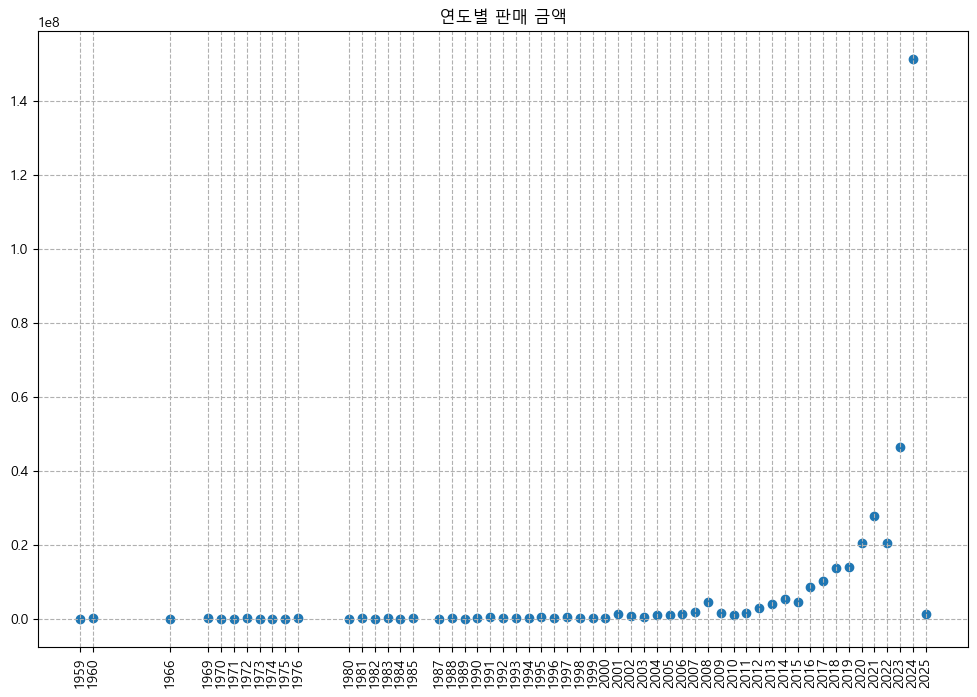

In [13]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(group_c_df.Year, group_c_df['Price'])
plt.grid(visible=True, linestyle='--')


ax.set_xticks(group_c_df['Year'])
ax.set_xticklabels(group_c_df['Year'], rotation=90)
plt.title('연도별 판매 금액')
plt.show()

In [14]:
pre_c_df

,Make,Year,Condition,Mileage,Price,Seller Rating,Seller Rating Count,Interior color,Drivetrain,Min MPG,...,1-owner vehicle,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,Lexus,2024,New,0.0,112865.0,4.7,1261.0,Black,Rear-wheel Drive,15.0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Acura,2007,Used,61110.0,11295.0,4.2,440.0,–,Front-wheel Drive,22.0,...,True,True,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,McLaren,2016,Used,6305.0,219997.0,3.1,421.0,Carbon Black,Rear-wheel Drive,NaN,...,False,False,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
3,Audi,2016,Used,65715.0,23999.0,3.6,123.0,Black,All-wheel Drive,23.0,...,False,True,True,0,3.0,5.0,5.0,5.0,5.0,5.0
4,BMW,2018,Used,19830.0,39799.0,4.4,91.0,Black,All-wheel Drive,0.0,...,True,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9011,Jeep,2024,New,10.0,52301.0,4.0,54.0,Global Black,Four-wheel Drive,18.0,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9012,BMW,2022,Used,48804.0,27979.0,4.8,3739.0,Canberra Beige,All-wheel Drive,21.0,...,True,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
9013,GMC,2024,New,3.0,51080.0,4.5,3896.0,Black,Four-wheel Drive,17.0,...,NaN,NaN,NaN,0,5.0,5.0,5.0,4.0,5.0,5.0
9014,GMC,2012,Used,146694.0,8995.0,NaN,NaN,Jet Black,All-wheel Drive,20.0,...,False,True,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
pre_c_df.Condition.value_counts()

Condition
Used         5005
New          3345
Certified     517
Name: count, dtype: int64

In [16]:
pre_c_df.Condition.isna().sum()

0

Condition은 labelEncoding 진행

<Axes: >

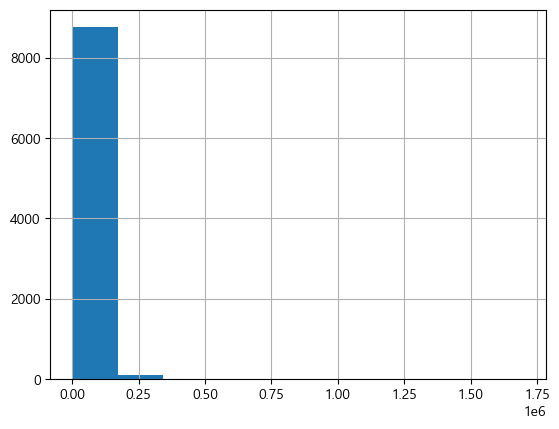

In [17]:
pre_c_df.Price.hist()

타겟데이터인 Price에 대한 전처리는 1 Cycle 후에 진행

In [18]:
pre_c_df.Price.isna().sum()

0

Price에 대한 결측치는 없는 것으로 확인

In [19]:
pre_c_df['Seller Rating'].value_counts()

Seller Rating
4.7    1191
4.8     910
4.9     750
4.5     701
4.6     688
4.4     661
4.2     480
4.3     401
4.1     379
5.0     209
4.0     148
3.5     137
3.1     111
3.7      90
2.9      82
3.9      70
3.8      63
3.6      62
2.7      62
2.8      58
1.3      41
2.6      34
2.0      29
1.4      28
3.4      27
3.0      24
2.5      19
3.3      18
2.2      18
2.3      16
3.2       5
1.9       1
Name: count, dtype: int64

Seller Rating과 Price의 연관성을 확인하기 위해 시각화
- 결측치 처리하기전에, feature가 불필요하다고 판단이 되면 제거해주기 위함.

In [20]:
group_c_df1 = pre_c_df[['Seller Rating', 'Price']].groupby('Seller Rating').sum('Price').reset_index()
group_c_df1

,Seller Rating,Price
0,1.3,539520.0
1,1.4,314830.0
2,1.9,5999.0
3,2.0,993204.0
4,2.2,349489.0
5,2.3,334820.0
6,2.5,569541.0
7,2.6,925932.0
8,2.7,1802521.0
9,2.8,3350927.0


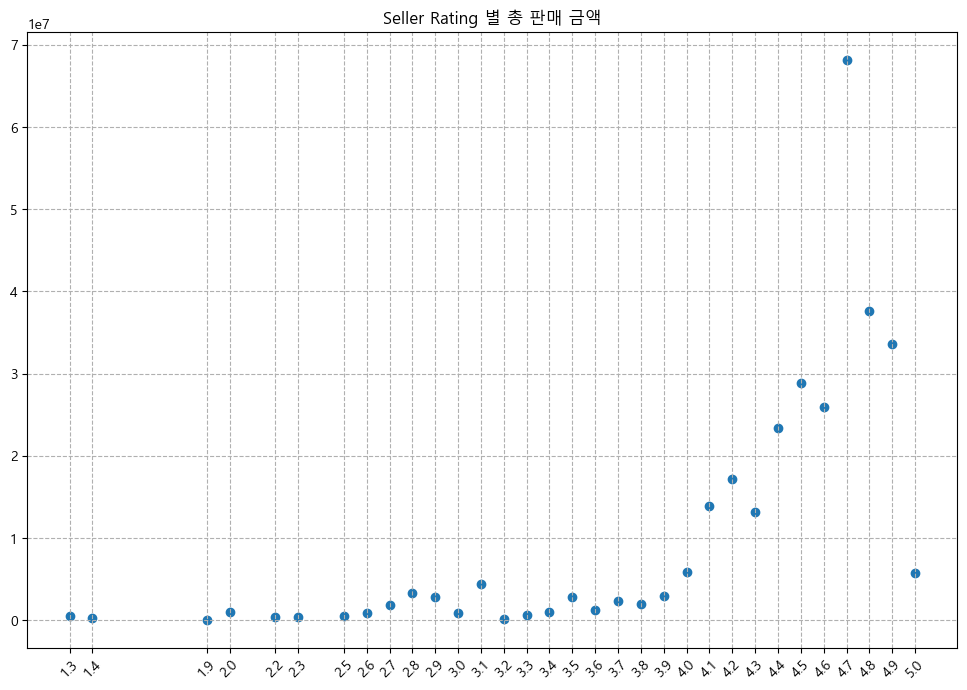

In [21]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(group_c_df1['Seller Rating'], group_c_df1['Price'])
plt.grid(visible=True, linestyle='--')


ax.set_xticks(group_c_df1['Seller Rating'])
ax.set_xticklabels(group_c_df1['Seller Rating'], rotation=45)
plt.title('Seller Rating 별 총 판매 금액')
plt.show()

유의미한 데이터라고 판단하여 결측치만 제거해주기로 결정

In [22]:
pre_c_df = pre_c_df[~pre_c_df['Seller Rating'].isna()]
pre_c_df

,Make,Year,Condition,Mileage,Price,Seller Rating,Seller Rating Count,Interior color,Drivetrain,Min MPG,...,1-owner vehicle,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,Lexus,2024,New,0.0,112865.0,4.7,1261.0,Black,Rear-wheel Drive,15.0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Acura,2007,Used,61110.0,11295.0,4.2,440.0,–,Front-wheel Drive,22.0,...,True,True,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,McLaren,2016,Used,6305.0,219997.0,3.1,421.0,Carbon Black,Rear-wheel Drive,NaN,...,False,False,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
3,Audi,2016,Used,65715.0,23999.0,3.6,123.0,Black,All-wheel Drive,23.0,...,False,True,True,0,3.0,5.0,5.0,5.0,5.0,5.0
4,BMW,2018,Used,19830.0,39799.0,4.4,91.0,Black,All-wheel Drive,0.0,...,True,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9007,Subaru,2024,New,6.0,33989.0,4.5,221.0,Black,All-wheel Drive,26.0,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9008,Mercedes-Benz,2012,Used,6657.0,144800.0,4.7,715.0,Sand,Rear-wheel Drive,14.0,...,False,False,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9011,Jeep,2024,New,10.0,52301.0,4.0,54.0,Global Black,Four-wheel Drive,18.0,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9012,BMW,2022,Used,48804.0,27979.0,4.8,3739.0,Canberra Beige,All-wheel Drive,21.0,...,True,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


Make와 Seller Rating Count feature는 제거

In [23]:
pre_c_df = pre_c_df.drop(labels=['Make', 'Seller Rating Count'], axis=1)
pre_c_df

,Year,Condition,Mileage,Price,Seller Rating,Interior color,Drivetrain,Min MPG,Max MPG,Fuel type,...,1-owner vehicle,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,2024,New,0.0,112865.0,4.7,Black,Rear-wheel Drive,15.0,25.0,Gasoline,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,Used,61110.0,11295.0,4.2,–,Front-wheel Drive,22.0,31.0,Gasoline,...,True,True,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,Used,6305.0,219997.0,3.1,Carbon Black,Rear-wheel Drive,NaN,NaN,Gasoline,...,False,False,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
3,2016,Used,65715.0,23999.0,3.6,Black,All-wheel Drive,23.0,27.0,Gasoline,...,False,True,True,0,3.0,5.0,5.0,5.0,5.0,5.0
4,2018,Used,19830.0,39799.0,4.4,Black,All-wheel Drive,0.0,0.0,Gasoline,...,True,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9007,2024,New,6.0,33989.0,4.5,Black,All-wheel Drive,26.0,33.0,Gasoline,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9008,2012,Used,6657.0,144800.0,4.7,Sand,Rear-wheel Drive,14.0,20.0,Gasoline,...,False,False,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9011,2024,New,10.0,52301.0,4.0,Global Black,Four-wheel Drive,18.0,25.0,Gasoline,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9012,2022,Used,48804.0,27979.0,4.8,Canberra Beige,All-wheel Drive,21.0,28.0,Gasoline,...,True,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
pre_c_df['Interior color'].value_counts()

Interior color
Black                          2838
Gray                            474
Jet Black                       448
–                               402
Ebony                           357
                               ... 
Titan Black w/Blue Accents        1
Nv/Black                          1
Terracotta Black                  1
GRAY & GREEN TWO TONE             1
Rd                                1
Name: count, Length: 531, dtype: int64

확인한 결과, Interior color 는 제거해주기로 결정

In [25]:
pre_c_df['Drivetrain'].value_counts()

Drivetrain
All-wheel Drive       3377
Front-wheel Drive     1613
Four-wheel Drive      1605
Rear-wheel Drive       754
AWD                     52
–                       38
RWD                     26
FWD                     21
Unknown                 19
4WD                      8
Name: count, dtype: int64

In [26]:
def changeDrive(x):
    if x == 'AWD ':
        return 'All-wheel Drive '
    if x == 'RWD ':
        return 'Rear-wheel Drive '
    if x == 'FWD ':
        return 'Front-wheel Drive '
    if x == '4WD ':
        return 'Four-wheel Drive '
    if x == '– ':
        return 'Unknown '
    else:
        return x

In [27]:
pre_c_df['Drivetrain'] = pre_c_df['Drivetrain'].apply(changeDrive)
pre_c_df.Drivetrain

0        Rear-wheel Drive 
1       Front-wheel Drive 
2        Rear-wheel Drive 
3         All-wheel Drive 
4         All-wheel Drive 
               ...        
9007      All-wheel Drive 
9008     Rear-wheel Drive 
9011     Four-wheel Drive 
9012      All-wheel Drive 
9013     Four-wheel Drive 
Name: Drivetrain, Length: 7513, dtype: object

In [28]:
pre_c_df[pre_c_df.Drivetrain == 'All-wheel Drive ']

,Year,Condition,Mileage,Price,Seller Rating,Interior color,Drivetrain,Min MPG,Max MPG,Fuel type,...,1-owner vehicle,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
3,2016,Used,65715.0,23999.0,3.6,Black,All-wheel Drive,23.0,27.0,Gasoline,...,False,True,True,0,3.0,5.0,5.0,5.0,5.0,5.0
4,2018,Used,19830.0,39799.0,4.4,Black,All-wheel Drive,0.0,0.0,Gasoline,...,True,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0
6,2019,Used,94008.0,26995.0,4.1,Black,All-wheel Drive,18.0,27.0,Gasoline,...,False,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
16,2024,New,2210.0,52715.0,4.1,Black,All-wheel Drive,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
18,2013,Used,84358.0,13900.0,4.8,Ivory,All-wheel Drive,25.0,33.0,Gasoline,...,False,True,NaN,1,4.0,3.0,1.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9001,2021,Used,40291.0,41795.0,2.9,Black,All-wheel Drive,18.0,24.0,Gasoline,...,True,True,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
9003,2024,New,17.0,33060.0,4.6,Jet Black w/Red Accents,All-wheel Drive,24.0,30.0,Gasoline,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9004,2024,New,11.0,62405.0,4.6,AMG Black,All-wheel Drive,23.0,33.0,Gasoline,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
9007,2024,New,6.0,33989.0,4.5,Black,All-wheel Drive,26.0,33.0,Gasoline,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0


In [29]:
pre_c_df.Drivetrain.value_counts()

Drivetrain
All-wheel Drive       3429
Front-wheel Drive     1634
Four-wheel Drive      1613
Rear-wheel Drive       780
Unknown                 57
Name: count, dtype: int64

In [30]:
pre_c_df

,Year,Condition,Mileage,Price,Seller Rating,Interior color,Drivetrain,Min MPG,Max MPG,Fuel type,...,1-owner vehicle,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,2024,New,0.0,112865.0,4.7,Black,Rear-wheel Drive,15.0,25.0,Gasoline,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,Used,61110.0,11295.0,4.2,–,Front-wheel Drive,22.0,31.0,Gasoline,...,True,True,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,Used,6305.0,219997.0,3.1,Carbon Black,Rear-wheel Drive,NaN,NaN,Gasoline,...,False,False,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
3,2016,Used,65715.0,23999.0,3.6,Black,All-wheel Drive,23.0,27.0,Gasoline,...,False,True,True,0,3.0,5.0,5.0,5.0,5.0,5.0
4,2018,Used,19830.0,39799.0,4.4,Black,All-wheel Drive,0.0,0.0,Gasoline,...,True,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9007,2024,New,6.0,33989.0,4.5,Black,All-wheel Drive,26.0,33.0,Gasoline,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9008,2012,Used,6657.0,144800.0,4.7,Sand,Rear-wheel Drive,14.0,20.0,Gasoline,...,False,False,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9011,2024,New,10.0,52301.0,4.0,Global Black,Four-wheel Drive,18.0,25.0,Gasoline,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9012,2022,Used,48804.0,27979.0,4.8,Canberra Beige,All-wheel Drive,21.0,28.0,Gasoline,...,True,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
pre_c_df = pre_c_df.drop(index=pre_c_df[pre_c_df['Drivetrain'] == 'Unknown '].index, axis=0)
pre_c_df

,Year,Condition,Mileage,Price,Seller Rating,Interior color,Drivetrain,Min MPG,Max MPG,Fuel type,...,1-owner vehicle,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,2024,New,0.0,112865.0,4.7,Black,Rear-wheel Drive,15.0,25.0,Gasoline,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,Used,61110.0,11295.0,4.2,–,Front-wheel Drive,22.0,31.0,Gasoline,...,True,True,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,Used,6305.0,219997.0,3.1,Carbon Black,Rear-wheel Drive,NaN,NaN,Gasoline,...,False,False,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
3,2016,Used,65715.0,23999.0,3.6,Black,All-wheel Drive,23.0,27.0,Gasoline,...,False,True,True,0,3.0,5.0,5.0,5.0,5.0,5.0
4,2018,Used,19830.0,39799.0,4.4,Black,All-wheel Drive,0.0,0.0,Gasoline,...,True,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9007,2024,New,6.0,33989.0,4.5,Black,All-wheel Drive,26.0,33.0,Gasoline,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9008,2012,Used,6657.0,144800.0,4.7,Sand,Rear-wheel Drive,14.0,20.0,Gasoline,...,False,False,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9011,2024,New,10.0,52301.0,4.0,Global Black,Four-wheel Drive,18.0,25.0,Gasoline,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9012,2022,Used,48804.0,27979.0,4.8,Canberra Beige,All-wheel Drive,21.0,28.0,Gasoline,...,True,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
pre_c_df.Drivetrain.value_counts()

Drivetrain
All-wheel Drive       3429
Front-wheel Drive     1634
Four-wheel Drive      1613
Rear-wheel Drive       780
Name: count, dtype: int64

In [33]:
pre_c_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7456 entries, 0 to 9013
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 7456 non-null   int64  
 1   Condition            7456 non-null   object 
 2   Mileage              7456 non-null   float64
 3   Price                7456 non-null   float64
 4   Seller Rating        7456 non-null   float64
 5   Interior color       7456 non-null   object 
 6   Drivetrain           7456 non-null   object 
 7   Min MPG              6195 non-null   float64
 8   Max MPG              6195 non-null   float64
 9   Fuel type            6951 non-null   object 
 10  Engine Size (L)      6791 non-null   float64
 11  Accidents or damage  4206 non-null   float64
 12  1-owner vehicle      4181 non-null   object 
 13  Personal use only    4206 non-null   object 
 14  Clean title          744 non-null    object 
 15  Open recall          7456 non-null   int64 

In [34]:
pre_c_df['Min MPG'].describe().T

count    6195.000000
mean       20.964972
std         7.117509
min         0.000000
25%        18.000000
50%        21.000000
75%        25.000000
max       150.000000
Name: Min MPG, dtype: float64

In [35]:
pre_c_df['Max MPG'].describe().T

count    6195.000000
mean       26.772720
std         8.390552
min         0.000000
25%        24.000000
50%        28.000000
75%        32.000000
max       122.000000
Name: Max MPG, dtype: float64

Min MPG, Max MPG 둘다 평균값과 중간값이 근사하기에 결측치를 중간값으로 대체해주기로 결정

In [36]:
pre_c_df['Min MPG'].fillna(pre_c_df['Min MPG'].median(), inplace=True)

In [37]:
pre_c_df['Max MPG'].fillna(pre_c_df['Max MPG'].median(), inplace=True)

In [38]:
pre_c_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7456 entries, 0 to 9013
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 7456 non-null   int64  
 1   Condition            7456 non-null   object 
 2   Mileage              7456 non-null   float64
 3   Price                7456 non-null   float64
 4   Seller Rating        7456 non-null   float64
 5   Interior color       7456 non-null   object 
 6   Drivetrain           7456 non-null   object 
 7   Min MPG              7456 non-null   float64
 8   Max MPG              7456 non-null   float64
 9   Fuel type            6951 non-null   object 
 10  Engine Size (L)      6791 non-null   float64
 11  Accidents or damage  4206 non-null   float64
 12  1-owner vehicle      4181 non-null   object 
 13  Personal use only    4206 non-null   object 
 14  Clean title          744 non-null    object 
 15  Open recall          7456 non-null   int64 

In [39]:
pre_c_df['Fuel type'].value_counts()

Fuel type
Gasoline             6232
Hybrid                393
Diesel                215
E85 Flex Fuel          87
–                      22
Gas/Electric Hyb        2
Name: count, dtype: int64

In [40]:
pre_c_df.drop(index = pre_c_df[pre_c_df['Fuel type'] == '– '].index, inplace=True)

In [41]:
pre_c_df['Fuel type'].value_counts()

Fuel type
Gasoline             6232
Hybrid                393
Diesel                215
E85 Flex Fuel          87
Gas/Electric Hyb        2
Name: count, dtype: int64

In [42]:
pre_c_df.drop(index = pre_c_df[pre_c_df['Fuel type'] == 'Gas/Electric Hyb '].index, inplace=True)

In [43]:
pre_c_df['Fuel type'].value_counts()

Fuel type
Gasoline          6232
Hybrid             393
Diesel             215
E85 Flex Fuel       87
Name: count, dtype: int64

Fuel type은 원핫 인코딩 진행

In [44]:
pre_c_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7432 entries, 0 to 9013
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 7432 non-null   int64  
 1   Condition            7432 non-null   object 
 2   Mileage              7432 non-null   float64
 3   Price                7432 non-null   float64
 4   Seller Rating        7432 non-null   float64
 5   Interior color       7432 non-null   object 
 6   Drivetrain           7432 non-null   object 
 7   Min MPG              7432 non-null   float64
 8   Max MPG              7432 non-null   float64
 9   Fuel type            6927 non-null   object 
 10  Engine Size (L)      6775 non-null   float64
 11  Accidents or damage  4198 non-null   float64
 12  1-owner vehicle      4173 non-null   object 
 13  Personal use only    4198 non-null   object 
 14  Clean title          742 non-null    object 
 15  Open recall          7432 non-null   int64 

In [45]:
pre_c_df = pre_c_df[~pre_c_df['Fuel type'].isna()]
pre_c_df

,Year,Condition,Mileage,Price,Seller Rating,Interior color,Drivetrain,Min MPG,Max MPG,Fuel type,...,1-owner vehicle,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,2024,New,0.0,112865.0,4.7,Black,Rear-wheel Drive,15.0,25.0,Gasoline,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,Used,61110.0,11295.0,4.2,–,Front-wheel Drive,22.0,31.0,Gasoline,...,True,True,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,Used,6305.0,219997.0,3.1,Carbon Black,Rear-wheel Drive,21.0,28.0,Gasoline,...,False,False,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
3,2016,Used,65715.0,23999.0,3.6,Black,All-wheel Drive,23.0,27.0,Gasoline,...,False,True,True,0,3.0,5.0,5.0,5.0,5.0,5.0
4,2018,Used,19830.0,39799.0,4.4,Black,All-wheel Drive,0.0,0.0,Gasoline,...,True,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9007,2024,New,6.0,33989.0,4.5,Black,All-wheel Drive,26.0,33.0,Gasoline,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9008,2012,Used,6657.0,144800.0,4.7,Sand,Rear-wheel Drive,14.0,20.0,Gasoline,...,False,False,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9011,2024,New,10.0,52301.0,4.0,Global Black,Four-wheel Drive,18.0,25.0,Gasoline,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9012,2022,Used,48804.0,27979.0,4.8,Canberra Beige,All-wheel Drive,21.0,28.0,Gasoline,...,True,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
pre_c_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6927 entries, 0 to 9013
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 6927 non-null   int64  
 1   Condition            6927 non-null   object 
 2   Mileage              6927 non-null   float64
 3   Price                6927 non-null   float64
 4   Seller Rating        6927 non-null   float64
 5   Interior color       6927 non-null   object 
 6   Drivetrain           6927 non-null   object 
 7   Min MPG              6927 non-null   float64
 8   Max MPG              6927 non-null   float64
 9   Fuel type            6927 non-null   object 
 10  Engine Size (L)      6754 non-null   float64
 11  Accidents or damage  3985 non-null   float64
 12  1-owner vehicle      3962 non-null   object 
 13  Personal use only    3985 non-null   object 
 14  Clean title          702 non-null    object 
 15  Open recall          6927 non-null   int64 

In [47]:
pre_c_df['Engine Size (L)'].value_counts()

Engine Size (L)
2.0    1604
2.5     833
3.6     704
1.5     509
3.5     476
3.0     473
2.4     281
1.3     140
1.6     122
2.3     118
4.0     114
6.2     112
5.3      98
5.7      85
6.7      80
3.7      77
4.4      74
1.4      72
1.8      71
5.6      68
6.4      58
2.7      58
3.4      53
3.8      53
5.0      52
1.2      45
3.2      34
4.3      28
3.3      26
4.6      25
4.7      25
6.0      23
6.6      23
6.8      22
2.9      21
5.5      18
5.2      17
3.9      12
4.2       8
5.4       8
1.0       4
7.3       4
6.3       3
8.3       3
2.2       3
8.1       3
6.1       3
4.5       3
8.0       2
2.8       2
8.4       1
4.8       1
1.7       1
7.4       1
Name: count, dtype: int64

In [48]:
pre_c_df['Engine Size (L)'].describe().T

count    6754.000000
mean        2.912704
std         1.292114
min         1.000000
25%         2.000000
50%         2.500000
75%         3.600000
max         8.400000
Name: Engine Size (L), dtype: float64

In [49]:
pre_c_df = pre_c_df[~pre_c_df['Engine Size (L)'].isna()]
pre_c_df

,Year,Condition,Mileage,Price,Seller Rating,Interior color,Drivetrain,Min MPG,Max MPG,Fuel type,...,1-owner vehicle,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,2024,New,0.0,112865.0,4.7,Black,Rear-wheel Drive,15.0,25.0,Gasoline,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,Used,61110.0,11295.0,4.2,–,Front-wheel Drive,22.0,31.0,Gasoline,...,True,True,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,Used,6305.0,219997.0,3.1,Carbon Black,Rear-wheel Drive,21.0,28.0,Gasoline,...,False,False,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
3,2016,Used,65715.0,23999.0,3.6,Black,All-wheel Drive,23.0,27.0,Gasoline,...,False,True,True,0,3.0,5.0,5.0,5.0,5.0,5.0
4,2018,Used,19830.0,39799.0,4.4,Black,All-wheel Drive,0.0,0.0,Gasoline,...,True,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9007,2024,New,6.0,33989.0,4.5,Black,All-wheel Drive,26.0,33.0,Gasoline,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9008,2012,Used,6657.0,144800.0,4.7,Sand,Rear-wheel Drive,14.0,20.0,Gasoline,...,False,False,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9011,2024,New,10.0,52301.0,4.0,Global Black,Four-wheel Drive,18.0,25.0,Gasoline,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9012,2022,Used,48804.0,27979.0,4.8,Canberra Beige,All-wheel Drive,21.0,28.0,Gasoline,...,True,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
pre_c_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6754 entries, 0 to 9013
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 6754 non-null   int64  
 1   Condition            6754 non-null   object 
 2   Mileage              6754 non-null   float64
 3   Price                6754 non-null   float64
 4   Seller Rating        6754 non-null   float64
 5   Interior color       6754 non-null   object 
 6   Drivetrain           6754 non-null   object 
 7   Min MPG              6754 non-null   float64
 8   Max MPG              6754 non-null   float64
 9   Fuel type            6754 non-null   object 
 10  Engine Size (L)      6754 non-null   float64
 11  Accidents or damage  3854 non-null   float64
 12  1-owner vehicle      3834 non-null   object 
 13  Personal use only    3854 non-null   object 
 14  Clean title          693 non-null    object 
 15  Open recall          6754 non-null   int64 

In [51]:
pre_c_df['Accidents or damage'].value_counts()

Accidents or damage
0.0    2589
1.0    1265
Name: count, dtype: int64

In [52]:
pre_c_df[pre_c_df['Accidents or damage'].isna()]

,Year,Condition,Mileage,Price,Seller Rating,Interior color,Drivetrain,Min MPG,Max MPG,Fuel type,...,1-owner vehicle,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,2024,New,0.0,112865.0,4.7,Black,Rear-wheel Drive,15.0,25.0,Gasoline,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
25,2023,New,0.0,106615.0,4.9,Red,Rear-wheel Drive,15.0,25.0,Gasoline,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
73,2024,New,0.0,115425.0,4.9,Black W/ Satin Metallic Trim,Rear-wheel Drive,15.0,0.0,Gasoline,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
88,2023,New,5.0,89485.0,4.1,Urban Brown/Glacier White,All-wheel Drive,17.0,24.0,Gasoline,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
114,2024,New,9.0,98705.0,3.1,Black,All-wheel Drive,17.0,24.0,Gasoline,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9005,2024,New,10.0,32990.0,4.5,Black,Four-wheel Drive,24.0,32.0,Gasoline,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9006,2023,New,5.0,42995.0,4.5,Black,Four-wheel Drive,22.0,28.0,Diesel,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9007,2024,New,6.0,33989.0,4.5,Black,All-wheel Drive,26.0,33.0,Gasoline,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9011,2024,New,10.0,52301.0,4.0,Global Black,Four-wheel Drive,18.0,25.0,Gasoline,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0


In [53]:
pre_c_df['1-owner vehicle'].value_counts()

1-owner vehicle
True     2028
False    1806
Name: count, dtype: int64

In [54]:
pre_c_df = pre_c_df.drop(labels=['1-owner vehicle'], axis=1)

In [55]:
pre_c_df

,Year,Condition,Mileage,Price,Seller Rating,Interior color,Drivetrain,Min MPG,Max MPG,Fuel type,...,Accidents or damage,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,2024,New,0.0,112865.0,4.7,Black,Rear-wheel Drive,15.0,25.0,Gasoline,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,Used,61110.0,11295.0,4.2,–,Front-wheel Drive,22.0,31.0,Gasoline,...,1.0,True,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,Used,6305.0,219997.0,3.1,Carbon Black,Rear-wheel Drive,21.0,28.0,Gasoline,...,1.0,False,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
3,2016,Used,65715.0,23999.0,3.6,Black,All-wheel Drive,23.0,27.0,Gasoline,...,1.0,True,True,0,3.0,5.0,5.0,5.0,5.0,5.0
4,2018,Used,19830.0,39799.0,4.4,Black,All-wheel Drive,0.0,0.0,Gasoline,...,0.0,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9007,2024,New,6.0,33989.0,4.5,Black,All-wheel Drive,26.0,33.0,Gasoline,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9008,2012,Used,6657.0,144800.0,4.7,Sand,Rear-wheel Drive,14.0,20.0,Gasoline,...,0.0,False,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9011,2024,New,10.0,52301.0,4.0,Global Black,Four-wheel Drive,18.0,25.0,Gasoline,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9012,2022,Used,48804.0,27979.0,4.8,Canberra Beige,All-wheel Drive,21.0,28.0,Gasoline,...,0.0,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
pre_c_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6754 entries, 0 to 9013
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 6754 non-null   int64  
 1   Condition            6754 non-null   object 
 2   Mileage              6754 non-null   float64
 3   Price                6754 non-null   float64
 4   Seller Rating        6754 non-null   float64
 5   Interior color       6754 non-null   object 
 6   Drivetrain           6754 non-null   object 
 7   Min MPG              6754 non-null   float64
 8   Max MPG              6754 non-null   float64
 9   Fuel type            6754 non-null   object 
 10  Engine Size (L)      6754 non-null   float64
 11  Accidents or damage  3854 non-null   float64
 12  Personal use only    3854 non-null   object 
 13  Clean title          693 non-null    object 
 14  Open recall          6754 non-null   int64  
 15  Comfort_score        3285 non-null   float6

In [57]:
pre_c_df['Personal use only'].value_counts()

Personal use only
True     2665
False    1189
Name: count, dtype: int64

Accidents or damage, Personal use only 는 feature를 제외해두고 따로 확인하기로 결정.

In [58]:
pre_c_df['Clean title'].value_counts()

Clean title
True     690
False      3
Name: count, dtype: int64

True의 비중이 많기에 결측치를 True로 다 채워줌

In [59]:
pre_c_df['Clean title'].fillna(True, inplace=True)

In [60]:
pre_c_df['Clean title'].value_counts()

Clean title
True     6751
False       3
Name: count, dtype: int64

In [61]:
pre_c_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6754 entries, 0 to 9013
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 6754 non-null   int64  
 1   Condition            6754 non-null   object 
 2   Mileage              6754 non-null   float64
 3   Price                6754 non-null   float64
 4   Seller Rating        6754 non-null   float64
 5   Interior color       6754 non-null   object 
 6   Drivetrain           6754 non-null   object 
 7   Min MPG              6754 non-null   float64
 8   Max MPG              6754 non-null   float64
 9   Fuel type            6754 non-null   object 
 10  Engine Size (L)      6754 non-null   float64
 11  Accidents or damage  3854 non-null   float64
 12  Personal use only    3854 non-null   object 
 13  Clean title          6754 non-null   bool   
 14  Open recall          6754 non-null   int64  
 15  Comfort_score        3285 non-null   float6

In [62]:
pre_c_df['Comfort_score'].value_counts()

Comfort_score
5.0    2470
4.0     526
3.0     183
1.0      73
2.0      33
Name: count, dtype: int64

In [63]:
pre_c_df['Comfort_score'].describe().T

count    3285.000000
mean        4.609437
std         0.822548
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Comfort_score, dtype: float64

Comfort_score, Interior_score, Performance_score, Value_score, Exterior_score, Reliability_score에 대한 판단을 위해 따로 추출해서 상관관계를 확인

In [64]:
new_pre_c_df = pre_c_df[~pre_c_df['Comfort_score'].isna()]
new_pre_c_df

,Year,Condition,Mileage,Price,Seller Rating,Interior color,Drivetrain,Min MPG,Max MPG,Fuel type,...,Accidents or damage,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
2,2016,Used,6305.0,219997.0,3.1,Carbon Black,Rear-wheel Drive,21.0,28.0,Gasoline,...,1.0,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3,2016,Used,65715.0,23999.0,3.6,Black,All-wheel Drive,23.0,27.0,Gasoline,...,1.0,True,True,0,3.0,5.0,5.0,5.0,5.0,5.0
4,2018,Used,19830.0,39799.0,4.4,Black,All-wheel Drive,0.0,0.0,Gasoline,...,0.0,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0
7,2012,Used,110202.0,14985.0,3.6,Gray,Rear-wheel Drive,21.0,28.0,Gasoline,...,1.0,False,True,0,5.0,5.0,5.0,4.0,4.0,3.0
18,2013,Used,84358.0,13900.0,4.8,Ivory,All-wheel Drive,25.0,33.0,Gasoline,...,1.0,True,True,1,4.0,3.0,1.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9006,2023,New,5.0,42995.0,4.5,Black,Four-wheel Drive,22.0,28.0,Diesel,...,NaN,NaN,True,0,5.0,5.0,5.0,5.0,5.0,5.0
9007,2024,New,6.0,33989.0,4.5,Black,All-wheel Drive,26.0,33.0,Gasoline,...,NaN,NaN,True,0,5.0,5.0,5.0,5.0,5.0,5.0
9008,2012,Used,6657.0,144800.0,4.7,Sand,Rear-wheel Drive,14.0,20.0,Gasoline,...,0.0,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0
9011,2024,New,10.0,52301.0,4.0,Global Black,Four-wheel Drive,18.0,25.0,Gasoline,...,NaN,NaN,True,0,5.0,5.0,5.0,5.0,5.0,5.0


In [65]:
new_pre_c_df = new_pre_c_df.reset_index(drop=True)
new_pre_c_df

,Year,Condition,Mileage,Price,Seller Rating,Interior color,Drivetrain,Min MPG,Max MPG,Fuel type,...,Accidents or damage,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,2016,Used,6305.0,219997.0,3.1,Carbon Black,Rear-wheel Drive,21.0,28.0,Gasoline,...,1.0,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0
1,2016,Used,65715.0,23999.0,3.6,Black,All-wheel Drive,23.0,27.0,Gasoline,...,1.0,True,True,0,3.0,5.0,5.0,5.0,5.0,5.0
2,2018,Used,19830.0,39799.0,4.4,Black,All-wheel Drive,0.0,0.0,Gasoline,...,0.0,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3,2012,Used,110202.0,14985.0,3.6,Gray,Rear-wheel Drive,21.0,28.0,Gasoline,...,1.0,False,True,0,5.0,5.0,5.0,4.0,4.0,3.0
4,2013,Used,84358.0,13900.0,4.8,Ivory,All-wheel Drive,25.0,33.0,Gasoline,...,1.0,True,True,1,4.0,3.0,1.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,2023,New,5.0,42995.0,4.5,Black,Four-wheel Drive,22.0,28.0,Diesel,...,NaN,NaN,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3281,2024,New,6.0,33989.0,4.5,Black,All-wheel Drive,26.0,33.0,Gasoline,...,NaN,NaN,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3282,2012,Used,6657.0,144800.0,4.7,Sand,Rear-wheel Drive,14.0,20.0,Gasoline,...,0.0,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3283,2024,New,10.0,52301.0,4.0,Global Black,Four-wheel Drive,18.0,25.0,Gasoline,...,NaN,NaN,True,0,5.0,5.0,5.0,5.0,5.0,5.0


In [66]:
new_pre_c_df.isna().sum()

Year                      0
Condition                 0
Mileage                   0
Price                     0
Seller Rating             0
Interior color            0
Drivetrain                0
Min MPG                   0
Max MPG                   0
Fuel type                 0
Engine Size (L)           0
Accidents or damage    1791
Personal use only      1791
Clean title               0
Open recall               0
Comfort_score             0
Interior_score            0
Performance_score         0
Value_score               0
Exterior_score            0
Reliability_score        44
dtype: int64

In [67]:
new_pre_c_df = new_pre_c_df.drop(labels=['Accidents or damage', 'Personal use only'], axis=1)
new_pre_c_df

,Year,Condition,Mileage,Price,Seller Rating,Interior color,Drivetrain,Min MPG,Max MPG,Fuel type,Engine Size (L),Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,2016,Used,6305.0,219997.0,3.1,Carbon Black,Rear-wheel Drive,21.0,28.0,Gasoline,3.8,True,0,5.0,5.0,5.0,5.0,5.0,5.0
1,2016,Used,65715.0,23999.0,3.6,Black,All-wheel Drive,23.0,27.0,Gasoline,2.0,True,0,3.0,5.0,5.0,5.0,5.0,5.0
2,2018,Used,19830.0,39799.0,4.4,Black,All-wheel Drive,0.0,0.0,Gasoline,2.0,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3,2012,Used,110202.0,14985.0,3.6,Gray,Rear-wheel Drive,21.0,28.0,Gasoline,5.6,True,0,5.0,5.0,5.0,4.0,4.0,3.0
4,2013,Used,84358.0,13900.0,4.8,Ivory,All-wheel Drive,25.0,33.0,Gasoline,2.0,True,1,4.0,3.0,1.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,2023,New,5.0,42995.0,4.5,Black,Four-wheel Drive,22.0,28.0,Diesel,3.0,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3281,2024,New,6.0,33989.0,4.5,Black,All-wheel Drive,26.0,33.0,Gasoline,2.5,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3282,2012,Used,6657.0,144800.0,4.7,Sand,Rear-wheel Drive,14.0,20.0,Gasoline,6.3,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3283,2024,New,10.0,52301.0,4.0,Global Black,Four-wheel Drive,18.0,25.0,Gasoline,3.6,True,0,5.0,5.0,5.0,5.0,5.0,5.0


In [68]:
new_pre_c_df = new_pre_c_df[~new_pre_c_df['Reliability_score'].isna()]
new_pre_c_df

,Year,Condition,Mileage,Price,Seller Rating,Interior color,Drivetrain,Min MPG,Max MPG,Fuel type,Engine Size (L),Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,2016,Used,6305.0,219997.0,3.1,Carbon Black,Rear-wheel Drive,21.0,28.0,Gasoline,3.8,True,0,5.0,5.0,5.0,5.0,5.0,5.0
1,2016,Used,65715.0,23999.0,3.6,Black,All-wheel Drive,23.0,27.0,Gasoline,2.0,True,0,3.0,5.0,5.0,5.0,5.0,5.0
2,2018,Used,19830.0,39799.0,4.4,Black,All-wheel Drive,0.0,0.0,Gasoline,2.0,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3,2012,Used,110202.0,14985.0,3.6,Gray,Rear-wheel Drive,21.0,28.0,Gasoline,5.6,True,0,5.0,5.0,5.0,4.0,4.0,3.0
4,2013,Used,84358.0,13900.0,4.8,Ivory,All-wheel Drive,25.0,33.0,Gasoline,2.0,True,1,4.0,3.0,1.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,2023,New,5.0,42995.0,4.5,Black,Four-wheel Drive,22.0,28.0,Diesel,3.0,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3281,2024,New,6.0,33989.0,4.5,Black,All-wheel Drive,26.0,33.0,Gasoline,2.5,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3282,2012,Used,6657.0,144800.0,4.7,Sand,Rear-wheel Drive,14.0,20.0,Gasoline,6.3,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3283,2024,New,10.0,52301.0,4.0,Global Black,Four-wheel Drive,18.0,25.0,Gasoline,3.6,True,0,5.0,5.0,5.0,5.0,5.0,5.0


In [69]:
new_pre_c_df.reset_index(drop=True, inplace=True)

In [70]:
new_pre_c_df

,Year,Condition,Mileage,Price,Seller Rating,Interior color,Drivetrain,Min MPG,Max MPG,Fuel type,Engine Size (L),Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,2016,Used,6305.0,219997.0,3.1,Carbon Black,Rear-wheel Drive,21.0,28.0,Gasoline,3.8,True,0,5.0,5.0,5.0,5.0,5.0,5.0
1,2016,Used,65715.0,23999.0,3.6,Black,All-wheel Drive,23.0,27.0,Gasoline,2.0,True,0,3.0,5.0,5.0,5.0,5.0,5.0
2,2018,Used,19830.0,39799.0,4.4,Black,All-wheel Drive,0.0,0.0,Gasoline,2.0,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3,2012,Used,110202.0,14985.0,3.6,Gray,Rear-wheel Drive,21.0,28.0,Gasoline,5.6,True,0,5.0,5.0,5.0,4.0,4.0,3.0
4,2013,Used,84358.0,13900.0,4.8,Ivory,All-wheel Drive,25.0,33.0,Gasoline,2.0,True,1,4.0,3.0,1.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3236,2023,New,5.0,42995.0,4.5,Black,Four-wheel Drive,22.0,28.0,Diesel,3.0,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3237,2024,New,6.0,33989.0,4.5,Black,All-wheel Drive,26.0,33.0,Gasoline,2.5,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3238,2012,Used,6657.0,144800.0,4.7,Sand,Rear-wheel Drive,14.0,20.0,Gasoline,6.3,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3239,2024,New,10.0,52301.0,4.0,Global Black,Four-wheel Drive,18.0,25.0,Gasoline,3.6,True,0,5.0,5.0,5.0,5.0,5.0,5.0


In [71]:
new_pre_c_df.isna().sum().sum()

0

In [72]:
new_pre_c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3241 entries, 0 to 3240
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               3241 non-null   int64  
 1   Condition          3241 non-null   object 
 2   Mileage            3241 non-null   float64
 3   Price              3241 non-null   float64
 4   Seller Rating      3241 non-null   float64
 5   Interior color     3241 non-null   object 
 6   Drivetrain         3241 non-null   object 
 7   Min MPG            3241 non-null   float64
 8   Max MPG            3241 non-null   float64
 9   Fuel type          3241 non-null   object 
 10  Engine Size (L)    3241 non-null   float64
 11  Clean title        3241 non-null   bool   
 12  Open recall        3241 non-null   int64  
 13  Comfort_score      3241 non-null   float64
 14  Interior_score     3241 non-null   float64
 15  Performance_score  3241 non-null   float64
 16  Value_score        3241 

In [73]:
columns = ['Year', 'Mileage','Seller Rating','Min MPG','Max MPG','Engine Size (L)','Open recall','Comfort_score','Interior_score','Performance_score','Value_score','Exterior_score','Reliability_score','Price']
new_pre_c_df1 = new_pre_c_df[columns]
new_pre_c_df1


,Year,Mileage,Seller Rating,Min MPG,Max MPG,Engine Size (L),Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score,Price
0,2016,6305.0,3.1,21.0,28.0,3.8,0,5.0,5.0,5.0,5.0,5.0,5.0,219997.0
1,2016,65715.0,3.6,23.0,27.0,2.0,0,3.0,5.0,5.0,5.0,5.0,5.0,23999.0
2,2018,19830.0,4.4,0.0,0.0,2.0,0,5.0,5.0,5.0,5.0,5.0,5.0,39799.0
3,2012,110202.0,3.6,21.0,28.0,5.6,0,5.0,5.0,5.0,4.0,4.0,3.0,14985.0
4,2013,84358.0,4.8,25.0,33.0,2.0,1,4.0,3.0,1.0,1.0,4.0,1.0,13900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3236,2023,5.0,4.5,22.0,28.0,3.0,0,5.0,5.0,5.0,5.0,5.0,5.0,42995.0
3237,2024,6.0,4.5,26.0,33.0,2.5,0,5.0,5.0,5.0,5.0,5.0,5.0,33989.0
3238,2012,6657.0,4.7,14.0,20.0,6.3,0,5.0,5.0,5.0,5.0,5.0,5.0,144800.0
3239,2024,10.0,4.0,18.0,25.0,3.6,0,5.0,5.0,5.0,5.0,5.0,5.0,52301.0


In [74]:
corr = new_pre_c_df1.corr()

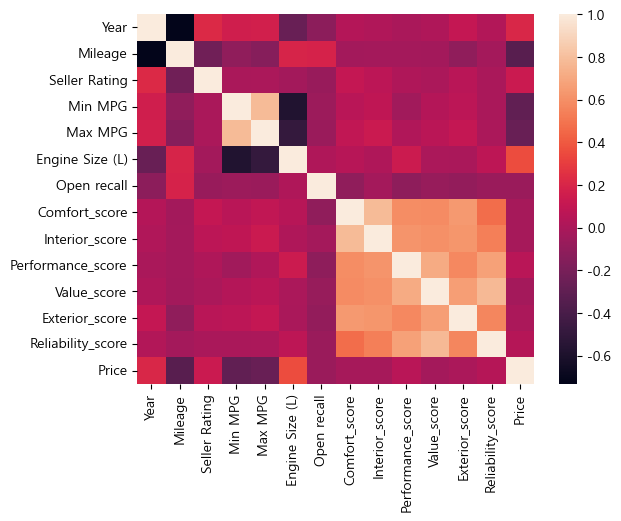

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr)
plt.show()

In [76]:
features, targets = new_pre_c_df1.iloc[:,:-1], new_pre_c_df1.iloc[:, -1]

In [77]:
from statsmodels.api import OLS

features, targets = new_pre_c_df1.iloc[:,:-1], new_pre_c_df1.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())


                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.797
Method:                 Least Squares   F-statistic:                              979.4
Date:                Fri, 10 May 2024   Prob (F-statistic):                        0.00
Time:                        01:04:07   Log-Likelihood:                         -37005.
No. Observations:                3241   AIC:                                  7.404e+04
Df Residuals:                    3228   BIC:                                  7.412e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [79]:
get_vif(features)

,vif_score,feature
0,160.221402,Year
1,1.567773,Mileage
2,67.353280,Seller Rating
3,35.826845,Min MPG
4,37.581224,Max MPG
5,10.370904,Engine Size (L)
6,1.125049,Open recall
7,97.093324,Comfort_score
8,101.543594,Interior_score
9,81.173538,Performance_score


In [80]:
pre_c_df

,Year,Condition,Mileage,Price,Seller Rating,Interior color,Drivetrain,Min MPG,Max MPG,Fuel type,...,Accidents or damage,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,2024,New,0.0,112865.0,4.7,Black,Rear-wheel Drive,15.0,25.0,Gasoline,...,NaN,NaN,True,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,Used,61110.0,11295.0,4.2,–,Front-wheel Drive,22.0,31.0,Gasoline,...,1.0,True,True,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,Used,6305.0,219997.0,3.1,Carbon Black,Rear-wheel Drive,21.0,28.0,Gasoline,...,1.0,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3,2016,Used,65715.0,23999.0,3.6,Black,All-wheel Drive,23.0,27.0,Gasoline,...,1.0,True,True,0,3.0,5.0,5.0,5.0,5.0,5.0
4,2018,Used,19830.0,39799.0,4.4,Black,All-wheel Drive,0.0,0.0,Gasoline,...,0.0,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9007,2024,New,6.0,33989.0,4.5,Black,All-wheel Drive,26.0,33.0,Gasoline,...,NaN,NaN,True,0,5.0,5.0,5.0,5.0,5.0,5.0
9008,2012,Used,6657.0,144800.0,4.7,Sand,Rear-wheel Drive,14.0,20.0,Gasoline,...,0.0,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0
9011,2024,New,10.0,52301.0,4.0,Global Black,Four-wheel Drive,18.0,25.0,Gasoline,...,NaN,NaN,True,0,5.0,5.0,5.0,5.0,5.0,5.0
9012,2022,Used,48804.0,27979.0,4.8,Canberra Beige,All-wheel Drive,21.0,28.0,Gasoline,...,0.0,False,True,0,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
pre_c_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6754 entries, 0 to 9013
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 6754 non-null   int64  
 1   Condition            6754 non-null   object 
 2   Mileage              6754 non-null   float64
 3   Price                6754 non-null   float64
 4   Seller Rating        6754 non-null   float64
 5   Interior color       6754 non-null   object 
 6   Drivetrain           6754 non-null   object 
 7   Min MPG              6754 non-null   float64
 8   Max MPG              6754 non-null   float64
 9   Fuel type            6754 non-null   object 
 10  Engine Size (L)      6754 non-null   float64
 11  Accidents or damage  3854 non-null   float64
 12  Personal use only    3854 non-null   object 
 13  Clean title          6754 non-null   bool   
 14  Open recall          6754 non-null   int64  
 15  Comfort_score        3285 non-null   float6

In [82]:
pre_c_df['Accidents or damage'].value_counts()

Accidents or damage
0.0    2589
1.0    1265
Name: count, dtype: int64

In [83]:
pre_c_df['Personal use only'].value_counts()

Personal use only
True     2665
False    1189
Name: count, dtype: int64

In [84]:
def changeAccident(x):
    if pd.isna(x):
        return 2
    elif x == 1:
        return 1
    else:
        return 0

In [85]:
pre_c_df['Accidents or damage'] = pre_c_df['Accidents or damage'].apply(changeAccident)

In [86]:
pre_c_df['Accidents or damage'].value_counts()

Accidents or damage
2    2900
0    2589
1    1265
Name: count, dtype: int64

In [87]:
def chagePersonal(x):
    if pd.isna(x):
        return 2
    elif x == True:
        return 1
    else:
        return 0

In [88]:
pre_c_df['Personal use only'] = pre_c_df['Personal use only'].apply(chagePersonal)

In [89]:
pre_c_df['Personal use only'].value_counts()

Personal use only
2    2900
1    2665
0    1189
Name: count, dtype: int64

In [90]:
pre_c_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6754 entries, 0 to 9013
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 6754 non-null   int64  
 1   Condition            6754 non-null   object 
 2   Mileage              6754 non-null   float64
 3   Price                6754 non-null   float64
 4   Seller Rating        6754 non-null   float64
 5   Interior color       6754 non-null   object 
 6   Drivetrain           6754 non-null   object 
 7   Min MPG              6754 non-null   float64
 8   Max MPG              6754 non-null   float64
 9   Fuel type            6754 non-null   object 
 10  Engine Size (L)      6754 non-null   float64
 11  Accidents or damage  6754 non-null   int64  
 12  Personal use only    6754 non-null   int64  
 13  Clean title          6754 non-null   bool   
 14  Open recall          6754 non-null   int64  
 15  Comfort_score        3285 non-null   float6

In [91]:
non_score_df = pre_c_df[~pre_c_df['Comfort_score'].isna()]
non_score_df

,Year,Condition,Mileage,Price,Seller Rating,Interior color,Drivetrain,Min MPG,Max MPG,Fuel type,...,Accidents or damage,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
2,2016,Used,6305.0,219997.0,3.1,Carbon Black,Rear-wheel Drive,21.0,28.0,Gasoline,...,1,0,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3,2016,Used,65715.0,23999.0,3.6,Black,All-wheel Drive,23.0,27.0,Gasoline,...,1,1,True,0,3.0,5.0,5.0,5.0,5.0,5.0
4,2018,Used,19830.0,39799.0,4.4,Black,All-wheel Drive,0.0,0.0,Gasoline,...,0,0,True,0,5.0,5.0,5.0,5.0,5.0,5.0
7,2012,Used,110202.0,14985.0,3.6,Gray,Rear-wheel Drive,21.0,28.0,Gasoline,...,1,0,True,0,5.0,5.0,5.0,4.0,4.0,3.0
18,2013,Used,84358.0,13900.0,4.8,Ivory,All-wheel Drive,25.0,33.0,Gasoline,...,1,1,True,1,4.0,3.0,1.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9006,2023,New,5.0,42995.0,4.5,Black,Four-wheel Drive,22.0,28.0,Diesel,...,2,2,True,0,5.0,5.0,5.0,5.0,5.0,5.0
9007,2024,New,6.0,33989.0,4.5,Black,All-wheel Drive,26.0,33.0,Gasoline,...,2,2,True,0,5.0,5.0,5.0,5.0,5.0,5.0
9008,2012,Used,6657.0,144800.0,4.7,Sand,Rear-wheel Drive,14.0,20.0,Gasoline,...,0,0,True,0,5.0,5.0,5.0,5.0,5.0,5.0
9011,2024,New,10.0,52301.0,4.0,Global Black,Four-wheel Drive,18.0,25.0,Gasoline,...,2,2,True,0,5.0,5.0,5.0,5.0,5.0,5.0


In [92]:
non_score_df.reset_index(drop=True, inplace=True)

In [93]:
non_score_df

,Year,Condition,Mileage,Price,Seller Rating,Interior color,Drivetrain,Min MPG,Max MPG,Fuel type,...,Accidents or damage,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,2016,Used,6305.0,219997.0,3.1,Carbon Black,Rear-wheel Drive,21.0,28.0,Gasoline,...,1,0,True,0,5.0,5.0,5.0,5.0,5.0,5.0
1,2016,Used,65715.0,23999.0,3.6,Black,All-wheel Drive,23.0,27.0,Gasoline,...,1,1,True,0,3.0,5.0,5.0,5.0,5.0,5.0
2,2018,Used,19830.0,39799.0,4.4,Black,All-wheel Drive,0.0,0.0,Gasoline,...,0,0,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3,2012,Used,110202.0,14985.0,3.6,Gray,Rear-wheel Drive,21.0,28.0,Gasoline,...,1,0,True,0,5.0,5.0,5.0,4.0,4.0,3.0
4,2013,Used,84358.0,13900.0,4.8,Ivory,All-wheel Drive,25.0,33.0,Gasoline,...,1,1,True,1,4.0,3.0,1.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,2023,New,5.0,42995.0,4.5,Black,Four-wheel Drive,22.0,28.0,Diesel,...,2,2,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3281,2024,New,6.0,33989.0,4.5,Black,All-wheel Drive,26.0,33.0,Gasoline,...,2,2,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3282,2012,Used,6657.0,144800.0,4.7,Sand,Rear-wheel Drive,14.0,20.0,Gasoline,...,0,0,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3283,2024,New,10.0,52301.0,4.0,Global Black,Four-wheel Drive,18.0,25.0,Gasoline,...,2,2,True,0,5.0,5.0,5.0,5.0,5.0,5.0


In [94]:
non_score_df.Condition.value_counts()

Condition
New          1774
Used         1334
Certified     177
Name: count, dtype: int64

In [95]:
def changeCondition(x):
    if x == 'New':
        return 0
    elif x == 'Used':
        return 1
    else:
        return 2

In [96]:
non_score_df['Condition'] = non_score_df['Condition'].apply(changeCondition)

C:\Users\kangh\AppData\Local\Temp\ipykernel_26068\3742474174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_score_df['Condition'] = non_score_df['Condition'].apply(changeCondition)


In [97]:
non_score_df

,Year,Condition,Mileage,Price,Seller Rating,Interior color,Drivetrain,Min MPG,Max MPG,Fuel type,...,Accidents or damage,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,2016,1,6305.0,219997.0,3.1,Carbon Black,Rear-wheel Drive,21.0,28.0,Gasoline,...,1,0,True,0,5.0,5.0,5.0,5.0,5.0,5.0
1,2016,1,65715.0,23999.0,3.6,Black,All-wheel Drive,23.0,27.0,Gasoline,...,1,1,True,0,3.0,5.0,5.0,5.0,5.0,5.0
2,2018,1,19830.0,39799.0,4.4,Black,All-wheel Drive,0.0,0.0,Gasoline,...,0,0,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3,2012,1,110202.0,14985.0,3.6,Gray,Rear-wheel Drive,21.0,28.0,Gasoline,...,1,0,True,0,5.0,5.0,5.0,4.0,4.0,3.0
4,2013,1,84358.0,13900.0,4.8,Ivory,All-wheel Drive,25.0,33.0,Gasoline,...,1,1,True,1,4.0,3.0,1.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,2023,0,5.0,42995.0,4.5,Black,Four-wheel Drive,22.0,28.0,Diesel,...,2,2,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3281,2024,0,6.0,33989.0,4.5,Black,All-wheel Drive,26.0,33.0,Gasoline,...,2,2,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3282,2012,1,6657.0,144800.0,4.7,Sand,Rear-wheel Drive,14.0,20.0,Gasoline,...,0,0,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3283,2024,0,10.0,52301.0,4.0,Global Black,Four-wheel Drive,18.0,25.0,Gasoline,...,2,2,True,0,5.0,5.0,5.0,5.0,5.0,5.0


In [98]:
non_score_df['Interior color'].value_counts()

Interior color
Black            1349
Gray              245
Global Black      205
–                 157
Jet Black         141
                 ... 
Nv/Black            1
Terracotta          1
Ebony Black         1
Olive               1
Rd                  1
Name: count, Length: 281, dtype: int64

In [99]:
non_score_df = non_score_df.drop(labels=['Interior color'], axis=1)
non_score_df

,Year,Condition,Mileage,Price,Seller Rating,Drivetrain,Min MPG,Max MPG,Fuel type,Engine Size (L),Accidents or damage,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,2016,1,6305.0,219997.0,3.1,Rear-wheel Drive,21.0,28.0,Gasoline,3.8,1,0,True,0,5.0,5.0,5.0,5.0,5.0,5.0
1,2016,1,65715.0,23999.0,3.6,All-wheel Drive,23.0,27.0,Gasoline,2.0,1,1,True,0,3.0,5.0,5.0,5.0,5.0,5.0
2,2018,1,19830.0,39799.0,4.4,All-wheel Drive,0.0,0.0,Gasoline,2.0,0,0,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3,2012,1,110202.0,14985.0,3.6,Rear-wheel Drive,21.0,28.0,Gasoline,5.6,1,0,True,0,5.0,5.0,5.0,4.0,4.0,3.0
4,2013,1,84358.0,13900.0,4.8,All-wheel Drive,25.0,33.0,Gasoline,2.0,1,1,True,1,4.0,3.0,1.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,2023,0,5.0,42995.0,4.5,Four-wheel Drive,22.0,28.0,Diesel,3.0,2,2,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3281,2024,0,6.0,33989.0,4.5,All-wheel Drive,26.0,33.0,Gasoline,2.5,2,2,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3282,2012,1,6657.0,144800.0,4.7,Rear-wheel Drive,14.0,20.0,Gasoline,6.3,0,0,True,0,5.0,5.0,5.0,5.0,5.0,5.0
3283,2024,0,10.0,52301.0,4.0,Four-wheel Drive,18.0,25.0,Gasoline,3.6,2,2,True,0,5.0,5.0,5.0,5.0,5.0,5.0


In [100]:
non_score_df.Drivetrain.value_counts()

Drivetrain
All-wheel Drive       1553
Four-wheel Drive       882
Front-wheel Drive      573
Rear-wheel Drive       277
Name: count, dtype: int64

In [101]:
non_score_df['Fuel type'].value_counts()

Fuel type
Gasoline          2943
Hybrid             271
Diesel              44
E85 Flex Fuel       27
Name: count, dtype: int64

In [102]:
non_score_df['Mean MPG'] = (non_score_df['Min MPG'] + non_score_df['Max MPG']) / 2

In [103]:
non_score_df = non_score_df.drop(labels=['Min MPG', 'Max MPG'], axis=1)
non_score_df

,Year,Condition,Mileage,Price,Seller Rating,Drivetrain,Fuel type,Engine Size (L),Accidents or damage,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score,Mean MPG
0,2016,1,6305.0,219997.0,3.1,Rear-wheel Drive,Gasoline,3.8,1,0,True,0,5.0,5.0,5.0,5.0,5.0,5.0,24.5
1,2016,1,65715.0,23999.0,3.6,All-wheel Drive,Gasoline,2.0,1,1,True,0,3.0,5.0,5.0,5.0,5.0,5.0,25.0
2,2018,1,19830.0,39799.0,4.4,All-wheel Drive,Gasoline,2.0,0,0,True,0,5.0,5.0,5.0,5.0,5.0,5.0,0.0
3,2012,1,110202.0,14985.0,3.6,Rear-wheel Drive,Gasoline,5.6,1,0,True,0,5.0,5.0,5.0,4.0,4.0,3.0,24.5
4,2013,1,84358.0,13900.0,4.8,All-wheel Drive,Gasoline,2.0,1,1,True,1,4.0,3.0,1.0,1.0,4.0,1.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,2023,0,5.0,42995.0,4.5,Four-wheel Drive,Diesel,3.0,2,2,True,0,5.0,5.0,5.0,5.0,5.0,5.0,25.0
3281,2024,0,6.0,33989.0,4.5,All-wheel Drive,Gasoline,2.5,2,2,True,0,5.0,5.0,5.0,5.0,5.0,5.0,29.5
3282,2012,1,6657.0,144800.0,4.7,Rear-wheel Drive,Gasoline,6.3,0,0,True,0,5.0,5.0,5.0,5.0,5.0,5.0,17.0
3283,2024,0,10.0,52301.0,4.0,Four-wheel Drive,Gasoline,3.6,2,2,True,0,5.0,5.0,5.0,5.0,5.0,5.0,21.5


In [104]:
non_score_df

,Year,Condition,Mileage,Price,Seller Rating,Drivetrain,Fuel type,Engine Size (L),Accidents or damage,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score,Mean MPG
0,2016,1,6305.0,219997.0,3.1,Rear-wheel Drive,Gasoline,3.8,1,0,True,0,5.0,5.0,5.0,5.0,5.0,5.0,24.5
1,2016,1,65715.0,23999.0,3.6,All-wheel Drive,Gasoline,2.0,1,1,True,0,3.0,5.0,5.0,5.0,5.0,5.0,25.0
2,2018,1,19830.0,39799.0,4.4,All-wheel Drive,Gasoline,2.0,0,0,True,0,5.0,5.0,5.0,5.0,5.0,5.0,0.0
3,2012,1,110202.0,14985.0,3.6,Rear-wheel Drive,Gasoline,5.6,1,0,True,0,5.0,5.0,5.0,4.0,4.0,3.0,24.5
4,2013,1,84358.0,13900.0,4.8,All-wheel Drive,Gasoline,2.0,1,1,True,1,4.0,3.0,1.0,1.0,4.0,1.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,2023,0,5.0,42995.0,4.5,Four-wheel Drive,Diesel,3.0,2,2,True,0,5.0,5.0,5.0,5.0,5.0,5.0,25.0
3281,2024,0,6.0,33989.0,4.5,All-wheel Drive,Gasoline,2.5,2,2,True,0,5.0,5.0,5.0,5.0,5.0,5.0,29.5
3282,2012,1,6657.0,144800.0,4.7,Rear-wheel Drive,Gasoline,6.3,0,0,True,0,5.0,5.0,5.0,5.0,5.0,5.0,17.0
3283,2024,0,10.0,52301.0,4.0,Four-wheel Drive,Gasoline,3.6,2,2,True,0,5.0,5.0,5.0,5.0,5.0,5.0,21.5


In [105]:
non_score_df['target'] = non_score_df['Price']
non_score_df.drop(labels=['Price'], axis=1, inplace=True)

In [106]:
non_score_df

,Year,Condition,Mileage,Seller Rating,Drivetrain,Fuel type,Engine Size (L),Accidents or damage,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score,Mean MPG,target
0,2016,1,6305.0,3.1,Rear-wheel Drive,Gasoline,3.8,1,0,True,0,5.0,5.0,5.0,5.0,5.0,5.0,24.5,219997.0
1,2016,1,65715.0,3.6,All-wheel Drive,Gasoline,2.0,1,1,True,0,3.0,5.0,5.0,5.0,5.0,5.0,25.0,23999.0
2,2018,1,19830.0,4.4,All-wheel Drive,Gasoline,2.0,0,0,True,0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,39799.0
3,2012,1,110202.0,3.6,Rear-wheel Drive,Gasoline,5.6,1,0,True,0,5.0,5.0,5.0,4.0,4.0,3.0,24.5,14985.0
4,2013,1,84358.0,4.8,All-wheel Drive,Gasoline,2.0,1,1,True,1,4.0,3.0,1.0,1.0,4.0,1.0,29.0,13900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,2023,0,5.0,4.5,Four-wheel Drive,Diesel,3.0,2,2,True,0,5.0,5.0,5.0,5.0,5.0,5.0,25.0,42995.0
3281,2024,0,6.0,4.5,All-wheel Drive,Gasoline,2.5,2,2,True,0,5.0,5.0,5.0,5.0,5.0,5.0,29.5,33989.0
3282,2012,1,6657.0,4.7,Rear-wheel Drive,Gasoline,6.3,0,0,True,0,5.0,5.0,5.0,5.0,5.0,5.0,17.0,144800.0
3283,2024,0,10.0,4.0,Four-wheel Drive,Gasoline,3.6,2,2,True,0,5.0,5.0,5.0,5.0,5.0,5.0,21.5,52301.0


In [107]:
non_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285 entries, 0 to 3284
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 3285 non-null   int64  
 1   Condition            3285 non-null   int64  
 2   Mileage              3285 non-null   float64
 3   Seller Rating        3285 non-null   float64
 4   Drivetrain           3285 non-null   object 
 5   Fuel type            3285 non-null   object 
 6   Engine Size (L)      3285 non-null   float64
 7   Accidents or damage  3285 non-null   int64  
 8   Personal use only    3285 non-null   int64  
 9   Clean title          3285 non-null   bool   
 10  Open recall          3285 non-null   int64  
 11  Comfort_score        3285 non-null   float64
 12  Interior_score       3285 non-null   float64
 13  Performance_score    3285 non-null   float64
 14  Value_score          3285 non-null   float64
 15  Exterior_score       3285 non-null   f

In [109]:
import numpy as np
non_score_df['Clean title'] = non_score_df['Clean title'].astype(np.int8)

In [110]:
non_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285 entries, 0 to 3284
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 3285 non-null   int64  
 1   Condition            3285 non-null   int64  
 2   Mileage              3285 non-null   float64
 3   Seller Rating        3285 non-null   float64
 4   Drivetrain           3285 non-null   object 
 5   Fuel type            3285 non-null   object 
 6   Engine Size (L)      3285 non-null   float64
 7   Accidents or damage  3285 non-null   int64  
 8   Personal use only    3285 non-null   int64  
 9   Clean title          3285 non-null   int8   
 10  Open recall          3285 non-null   int64  
 11  Comfort_score        3285 non-null   float64
 12  Interior_score       3285 non-null   float64
 13  Performance_score    3285 non-null   float64
 14  Value_score          3285 non-null   float64
 15  Exterior_score       3285 non-null   f

In [111]:
non_score_df = non_score_df[~non_score_df['Reliability_score'].isna()].reset_index(drop=True)
non_score_df

,Year,Condition,Mileage,Seller Rating,Drivetrain,Fuel type,Engine Size (L),Accidents or damage,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score,Mean MPG,target
0,2016,1,6305.0,3.1,Rear-wheel Drive,Gasoline,3.8,1,0,1,0,5.0,5.0,5.0,5.0,5.0,5.0,24.5,219997.0
1,2016,1,65715.0,3.6,All-wheel Drive,Gasoline,2.0,1,1,1,0,3.0,5.0,5.0,5.0,5.0,5.0,25.0,23999.0
2,2018,1,19830.0,4.4,All-wheel Drive,Gasoline,2.0,0,0,1,0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,39799.0
3,2012,1,110202.0,3.6,Rear-wheel Drive,Gasoline,5.6,1,0,1,0,5.0,5.0,5.0,4.0,4.0,3.0,24.5,14985.0
4,2013,1,84358.0,4.8,All-wheel Drive,Gasoline,2.0,1,1,1,1,4.0,3.0,1.0,1.0,4.0,1.0,29.0,13900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3236,2023,0,5.0,4.5,Four-wheel Drive,Diesel,3.0,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,25.0,42995.0
3237,2024,0,6.0,4.5,All-wheel Drive,Gasoline,2.5,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,29.5,33989.0
3238,2012,1,6657.0,4.7,Rear-wheel Drive,Gasoline,6.3,0,0,1,0,5.0,5.0,5.0,5.0,5.0,5.0,17.0,144800.0
3239,2024,0,10.0,4.0,Four-wheel Drive,Gasoline,3.6,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,21.5,52301.0


위 Drivetrain, Fuel_type 에 대해서, one-hot을 적용했더니, 다중공산성의 문제가 발생하고, R2 점수도 안좋게 나옴을 확인했다.
- 수치 데이터로 매핑을 해서 진행

In [112]:
# 범주형 변수의 평균 target 값으로 매핑
category_means = non_score_df.groupby('Drivetrain')['target'].mean().to_dict()
non_score_df['Drivetrain_mean_encoded'] = non_score_df['Drivetrain'].map(category_means)


In [113]:
# 범주형 변수의 평균 target 값으로 매핑
category_means = non_score_df.groupby('Fuel type')['target'].mean().to_dict()
non_score_df['Fuel_type_mean_encoded'] = non_score_df['Fuel type'].map(category_means)


In [114]:
non_score_df

,Year,Condition,Mileage,Seller Rating,Drivetrain,Fuel type,Engine Size (L),Accidents or damage,Personal use only,Clean title,...,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score,Mean MPG,target,Drivetrain_mean_encoded,Fuel_type_mean_encoded
0,2016,1,6305.0,3.1,Rear-wheel Drive,Gasoline,3.8,1,0,1,...,5.0,5.0,5.0,5.0,5.0,5.0,24.5,219997.0,53170.221374,41154.507396
1,2016,1,65715.0,3.6,All-wheel Drive,Gasoline,2.0,1,1,1,...,3.0,5.0,5.0,5.0,5.0,5.0,25.0,23999.0,41648.667971,41154.507396
2,2018,1,19830.0,4.4,All-wheel Drive,Gasoline,2.0,0,0,1,...,5.0,5.0,5.0,5.0,5.0,5.0,0.0,39799.0,41648.667971,41154.507396
3,2012,1,110202.0,3.6,Rear-wheel Drive,Gasoline,5.6,1,0,1,...,5.0,5.0,5.0,4.0,4.0,3.0,24.5,14985.0,53170.221374,41154.507396
4,2013,1,84358.0,4.8,All-wheel Drive,Gasoline,2.0,1,1,1,...,4.0,3.0,1.0,1.0,4.0,1.0,29.0,13900.0,41648.667971,41154.507396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3236,2023,0,5.0,4.5,Four-wheel Drive,Diesel,3.0,2,2,1,...,5.0,5.0,5.0,5.0,5.0,5.0,25.0,42995.0,46121.874007,39199.295455
3237,2024,0,6.0,4.5,All-wheel Drive,Gasoline,2.5,2,2,1,...,5.0,5.0,5.0,5.0,5.0,5.0,29.5,33989.0,41648.667971,41154.507396
3238,2012,1,6657.0,4.7,Rear-wheel Drive,Gasoline,6.3,0,0,1,...,5.0,5.0,5.0,5.0,5.0,5.0,17.0,144800.0,53170.221374,41154.507396
3239,2024,0,10.0,4.0,Four-wheel Drive,Gasoline,3.6,2,2,1,...,5.0,5.0,5.0,5.0,5.0,5.0,21.5,52301.0,46121.874007,41154.507396


In [115]:
non_score_df.drop(labels=['Drivetrain', 'Fuel type'], axis=1, inplace=True)

In [116]:
non_score_df['Target'] = non_score_df['target']
non_score_df.drop(labels=['target'], axis=1, inplace=True)
non_score_df

,Year,Condition,Mileage,Seller Rating,Engine Size (L),Accidents or damage,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score,Mean MPG,Drivetrain_mean_encoded,Fuel_type_mean_encoded,Target
0,2016,1,6305.0,3.1,3.8,1,0,1,0,5.0,5.0,5.0,5.0,5.0,5.0,24.5,53170.221374,41154.507396,219997.0
1,2016,1,65715.0,3.6,2.0,1,1,1,0,3.0,5.0,5.0,5.0,5.0,5.0,25.0,41648.667971,41154.507396,23999.0
2,2018,1,19830.0,4.4,2.0,0,0,1,0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,41648.667971,41154.507396,39799.0
3,2012,1,110202.0,3.6,5.6,1,0,1,0,5.0,5.0,5.0,4.0,4.0,3.0,24.5,53170.221374,41154.507396,14985.0
4,2013,1,84358.0,4.8,2.0,1,1,1,1,4.0,3.0,1.0,1.0,4.0,1.0,29.0,41648.667971,41154.507396,13900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3236,2023,0,5.0,4.5,3.0,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,25.0,46121.874007,39199.295455,42995.0
3237,2024,0,6.0,4.5,2.5,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,29.5,41648.667971,41154.507396,33989.0
3238,2012,1,6657.0,4.7,6.3,0,0,1,0,5.0,5.0,5.0,5.0,5.0,5.0,17.0,53170.221374,41154.507396,144800.0
3239,2024,0,10.0,4.0,3.6,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,21.5,46121.874007,41154.507396,52301.0


Cycle 1 위 전처리된 모델로 훈련 진행

In [117]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    #MSLE = mean_squared_log_error(y_test, prediction)
    #RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [118]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation_msle(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [119]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = non_score_df.iloc[:, :-1], non_score_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [120]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 286002933.4283, RMSE: 16911.6213, R2: 0.4136


In [121]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = non_score_df.iloc[:, :-1], non_score_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=4).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [122]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 448953208717431.8125, RMSE: 21188515.9631, R2: -920542.6036


In [123]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = non_score_df.iloc[:, :-1], non_score_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 220393698.5718, RMSE: 14845.6626, R2: 0.5481
RandomForestRegressor
MSE: 108425078.1788, RMSE: 10412.7363, R2: 0.7777
GradientBoostingRegressor
MSE: 128525863.3783, RMSE: 11336.9248, R2: 0.7365
XGBRegressor
MSE: 122760904.9215, RMSE: 11079.7520, R2: 0.7483
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 481
[LightGBM] [Info] Number of data points in the train set: 2592, number of used features: 17
[LightGBM] [Info] Start training from score 41081.327160
LGBMRegressor
MSE: 127973211.6485, RMSE: 11312.5245, R2: 0.7376


확인한 결과 위 모델은 비선형 모델인 것을 알 수 있었다.

### Cycle 2
- 데이터 전처리

In [124]:
non_score_df

,Year,Condition,Mileage,Seller Rating,Engine Size (L),Accidents or damage,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score,Mean MPG,Drivetrain_mean_encoded,Fuel_type_mean_encoded,Target
0,2016,1,6305.0,3.1,3.8,1,0,1,0,5.0,5.0,5.0,5.0,5.0,5.0,24.5,53170.221374,41154.507396,219997.0
1,2016,1,65715.0,3.6,2.0,1,1,1,0,3.0,5.0,5.0,5.0,5.0,5.0,25.0,41648.667971,41154.507396,23999.0
2,2018,1,19830.0,4.4,2.0,0,0,1,0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,41648.667971,41154.507396,39799.0
3,2012,1,110202.0,3.6,5.6,1,0,1,0,5.0,5.0,5.0,4.0,4.0,3.0,24.5,53170.221374,41154.507396,14985.0
4,2013,1,84358.0,4.8,2.0,1,1,1,1,4.0,3.0,1.0,1.0,4.0,1.0,29.0,41648.667971,41154.507396,13900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3236,2023,0,5.0,4.5,3.0,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,25.0,46121.874007,39199.295455,42995.0
3237,2024,0,6.0,4.5,2.5,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,29.5,41648.667971,41154.507396,33989.0
3238,2012,1,6657.0,4.7,6.3,0,0,1,0,5.0,5.0,5.0,5.0,5.0,5.0,17.0,53170.221374,41154.507396,144800.0
3239,2024,0,10.0,4.0,3.6,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,21.5,46121.874007,41154.507396,52301.0


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Condition'}>,
        <Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Seller Rating'}>],
       [<Axes: title={'center': 'Engine Size (L)'}>,
        <Axes: title={'center': 'Accidents or damage'}>,
        <Axes: title={'center': 'Personal use only'}>,
        <Axes: title={'center': 'Clean title'}>],
       [<Axes: title={'center': 'Open recall'}>,
        <Axes: title={'center': 'Comfort_score'}>,
        <Axes: title={'center': 'Interior_score'}>,
        <Axes: title={'center': 'Performance_score'}>],
       [<Axes: title={'center': 'Value_score'}>,
        <Axes: title={'center': 'Exterior_score'}>,
        <Axes: title={'center': 'Reliability_score'}>,
        <Axes: title={'center': 'Mean MPG'}>],
       [<Axes: title={'center': 'Drivetrain_mean_encoded'}>,
        <Axes: title={'center': 'Fuel_type_mean_encoded'}>,
        <Axes: title={'center': 'Target'}>, <Axes: >]], dtype=objec

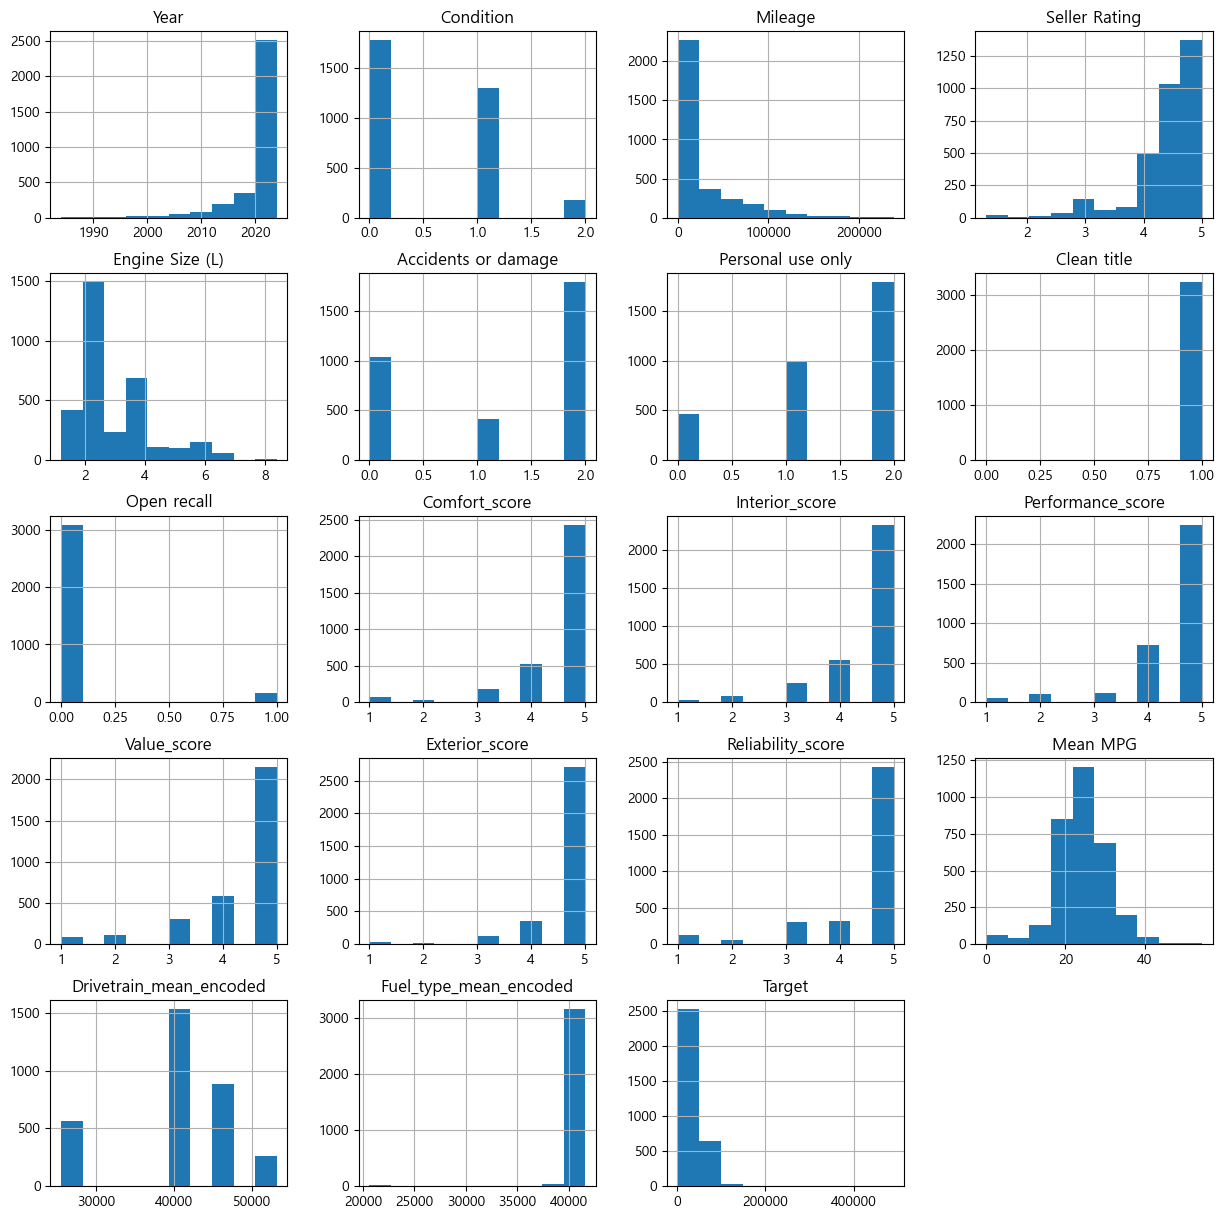

In [125]:
non_score_df.hist(figsize=(15,15))

Target에 대해서 이상치 제거 진행

In [126]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
target = scaler.fit_transform(non_score_df.iloc[:, -1].values.reshape(-1, 1))
std_pre_df = non_score_df.copy()
std_pre_df['Target'] = target

In [127]:
std_pre_df

,Year,Condition,Mileage,Seller Rating,Engine Size (L),Accidents or damage,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score,Mean MPG,Drivetrain_mean_encoded,Fuel_type_mean_encoded,Target
0,2016,1,6305.0,3.1,3.8,1,0,1,0,5.0,5.0,5.0,5.0,5.0,5.0,24.5,53170.221374,41154.507396,6.701378
1,2016,1,65715.0,3.6,2.0,1,1,1,0,3.0,5.0,5.0,5.0,5.0,5.0,25.0,41648.667971,41154.507396,-0.636080
2,2018,1,19830.0,4.4,2.0,0,0,1,0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,41648.667971,41154.507396,-0.044585
3,2012,1,110202.0,3.6,5.6,1,0,1,0,5.0,5.0,5.0,4.0,4.0,3.0,24.5,53170.221374,41154.507396,-0.973532
4,2013,1,84358.0,4.8,2.0,1,1,1,1,4.0,3.0,1.0,1.0,4.0,1.0,29.0,41648.667971,41154.507396,-1.014150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3236,2023,0,5.0,4.5,3.0,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,25.0,46121.874007,39199.295455,0.075061
3237,2024,0,6.0,4.5,2.5,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,29.5,41648.667971,41154.507396,-0.262091
3238,2012,1,6657.0,4.7,6.3,0,0,1,0,5.0,5.0,5.0,5.0,5.0,5.0,17.0,53170.221374,41154.507396,3.886273
3239,2024,0,10.0,4.0,3.6,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,21.5,46121.874007,41154.507396,0.423444


In [128]:
std_pre_df = std_pre_df[std_pre_df['Target'].between(-1.96, 1.96)]
std_pre_df

,Year,Condition,Mileage,Seller Rating,Engine Size (L),Accidents or damage,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score,Mean MPG,Drivetrain_mean_encoded,Fuel_type_mean_encoded,Target
1,2016,1,65715.0,3.6,2.0,1,1,1,0,3.0,5.0,5.0,5.0,5.0,5.0,25.0,41648.667971,41154.507396,-0.636080
2,2018,1,19830.0,4.4,2.0,0,0,1,0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,41648.667971,41154.507396,-0.044585
3,2012,1,110202.0,3.6,5.6,1,0,1,0,5.0,5.0,5.0,4.0,4.0,3.0,24.5,53170.221374,41154.507396,-0.973532
4,2013,1,84358.0,4.8,2.0,1,1,1,1,4.0,3.0,1.0,1.0,4.0,1.0,29.0,41648.667971,41154.507396,-1.014150
5,2019,1,33832.0,4.9,2.0,0,1,1,0,4.0,5.0,5.0,5.0,5.0,5.0,26.0,41648.667971,41154.507396,-0.037435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,2024,0,10.0,4.5,2.0,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,28.0,46121.874007,41154.507396,-0.299490
3236,2023,0,5.0,4.5,3.0,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,25.0,46121.874007,39199.295455,0.075061
3237,2024,0,6.0,4.5,2.5,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,29.5,41648.667971,41154.507396,-0.262091
3239,2024,0,10.0,4.0,3.6,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,21.5,46121.874007,41154.507396,0.423444


In [129]:
non_score_df = non_score_df.loc[std_pre_df.index]
non_score_df

,Year,Condition,Mileage,Seller Rating,Engine Size (L),Accidents or damage,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score,Mean MPG,Drivetrain_mean_encoded,Fuel_type_mean_encoded,Target
1,2016,1,65715.0,3.6,2.0,1,1,1,0,3.0,5.0,5.0,5.0,5.0,5.0,25.0,41648.667971,41154.507396,23999.0
2,2018,1,19830.0,4.4,2.0,0,0,1,0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,41648.667971,41154.507396,39799.0
3,2012,1,110202.0,3.6,5.6,1,0,1,0,5.0,5.0,5.0,4.0,4.0,3.0,24.5,53170.221374,41154.507396,14985.0
4,2013,1,84358.0,4.8,2.0,1,1,1,1,4.0,3.0,1.0,1.0,4.0,1.0,29.0,41648.667971,41154.507396,13900.0
5,2019,1,33832.0,4.9,2.0,0,1,1,0,4.0,5.0,5.0,5.0,5.0,5.0,26.0,41648.667971,41154.507396,39990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,2024,0,10.0,4.5,2.0,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,28.0,46121.874007,41154.507396,32990.0
3236,2023,0,5.0,4.5,3.0,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,25.0,46121.874007,39199.295455,42995.0
3237,2024,0,6.0,4.5,2.5,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,29.5,41648.667971,41154.507396,33989.0
3239,2024,0,10.0,4.0,3.6,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,21.5,46121.874007,41154.507396,52301.0


In [130]:
non_score_df = non_score_df.reset_index(drop=True)
non_score_df

,Year,Condition,Mileage,Seller Rating,Engine Size (L),Accidents or damage,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score,Mean MPG,Drivetrain_mean_encoded,Fuel_type_mean_encoded,Target
0,2016,1,65715.0,3.6,2.0,1,1,1,0,3.0,5.0,5.0,5.0,5.0,5.0,25.0,41648.667971,41154.507396,23999.0
1,2018,1,19830.0,4.4,2.0,0,0,1,0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,41648.667971,41154.507396,39799.0
2,2012,1,110202.0,3.6,5.6,1,0,1,0,5.0,5.0,5.0,4.0,4.0,3.0,24.5,53170.221374,41154.507396,14985.0
3,2013,1,84358.0,4.8,2.0,1,1,1,1,4.0,3.0,1.0,1.0,4.0,1.0,29.0,41648.667971,41154.507396,13900.0
4,2019,1,33832.0,4.9,2.0,0,1,1,0,4.0,5.0,5.0,5.0,5.0,5.0,26.0,41648.667971,41154.507396,39990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,2024,0,10.0,4.5,2.0,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,28.0,46121.874007,41154.507396,32990.0
3165,2023,0,5.0,4.5,3.0,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,25.0,46121.874007,39199.295455,42995.0
3166,2024,0,6.0,4.5,2.5,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,29.5,41648.667971,41154.507396,33989.0
3167,2024,0,10.0,4.0,3.6,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,21.5,46121.874007,41154.507396,52301.0


<Axes: >

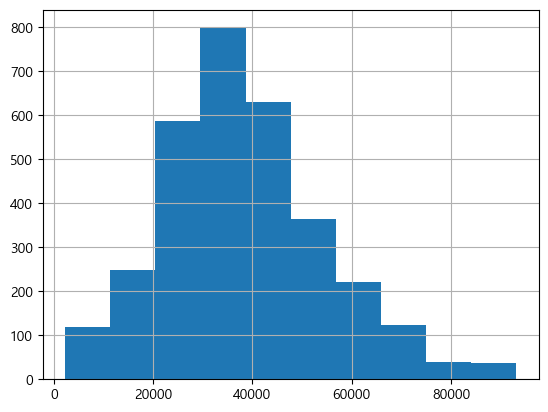

In [131]:
non_score_df.Target.hist()

In [132]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = non_score_df.iloc[:, :-1], non_score_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 48083778.4947, RMSE: 6934.2468, R2: 0.8258
RandomForestRegressor
MSE: 31382275.5446, RMSE: 5601.9885, R2: 0.8863
GradientBoostingRegressor
MSE: 55806414.7064, RMSE: 7470.3691, R2: 0.7978
XGBRegressor
MSE: 32535459.8546, RMSE: 5703.9863, R2: 0.8821
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 475
[LightGBM] [Info] Number of data points in the train set: 2535, number of used features: 17
[LightGBM] [Info] Start training from score 38353.344773
LGBMRegressor
MSE: 34200649.4323, RMSE: 5848.1321, R2: 0.8761


교차검증 수행

In [133]:
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor

features, targets = non_score_df.iloc[:, :-1], non_score_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124)

parameters = {'max_depth': [4, 8, 12, 20], 'min_samples_split': [20, 30, 40, 50, 60], 'n_estimators': [10, 50, 100, 500, 1000]}
kfold = KFold(n_splits=10, random_state=124, shuffle=True)

grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)
# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=124, shuffle=True),
             estimator=RandomForestRegressor(random_state=124),
             param_grid={'max_depth': [4, 8, 12, 20],
                         'min_samples_split': [20, 30, 40, 50, 60],
                         'n_estimators': [10, 50, 100, 500, 1000]},
             scoring='neg_mean_squared_error')

In [134]:
result_df = pd.DataFrame(grid_rf_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",-9.214994e+07,96
1,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",-9.063052e+07,85
2,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",-9.017777e+07,80
3,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",-8.979560e+07,77
4,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",-8.957075e+07,76
...,...,...,...
95,"{'max_depth': 20, 'min_samples_split': 60, 'n_...",-6.637878e+07,63
96,"{'max_depth': 20, 'min_samples_split': 60, 'n_...",-6.412437e+07,55
97,"{'max_depth': 20, 'min_samples_split': 60, 'n_...",-6.389560e+07,54
98,"{'max_depth': 20, 'min_samples_split': 60, 'n_...",-6.338671e+07,49


In [135]:
rf_r = grid_rf_r.best_estimator_
prediction = rf_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 43420911.9328, RMSE: 6589.4546, R2: 0.8427


과적합된 것은 아님을 확인

### Cycle 3
- OLS, vif 확인

In [136]:
non_score_df

,Year,Condition,Mileage,Seller Rating,Engine Size (L),Accidents or damage,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score,Mean MPG,Drivetrain_mean_encoded,Fuel_type_mean_encoded,Target
0,2016,1,65715.0,3.6,2.0,1,1,1,0,3.0,5.0,5.0,5.0,5.0,5.0,25.0,41648.667971,41154.507396,23999.0
1,2018,1,19830.0,4.4,2.0,0,0,1,0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,41648.667971,41154.507396,39799.0
2,2012,1,110202.0,3.6,5.6,1,0,1,0,5.0,5.0,5.0,4.0,4.0,3.0,24.5,53170.221374,41154.507396,14985.0
3,2013,1,84358.0,4.8,2.0,1,1,1,1,4.0,3.0,1.0,1.0,4.0,1.0,29.0,41648.667971,41154.507396,13900.0
4,2019,1,33832.0,4.9,2.0,0,1,1,0,4.0,5.0,5.0,5.0,5.0,5.0,26.0,41648.667971,41154.507396,39990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,2024,0,10.0,4.5,2.0,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,28.0,46121.874007,41154.507396,32990.0
3165,2023,0,5.0,4.5,3.0,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,25.0,46121.874007,39199.295455,42995.0
3166,2024,0,6.0,4.5,2.5,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,29.5,41648.667971,41154.507396,33989.0
3167,2024,0,10.0,4.0,3.6,2,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,21.5,46121.874007,41154.507396,52301.0


In [137]:
features, targets = non_score_df.iloc[: ,:-1], non_score_df.iloc[:, -1]

In [138]:
from statsmodels.api import OLS

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              2341.
Date:                Fri, 10 May 2024   Prob (F-statistic):                        0.00
Time:                        01:21:17   Log-Likelihood:                         -33983.
No. Observations:                3169   AIC:                                  6.800e+04
Df Residuals:                    3151   BIC:                                  6.811e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [139]:
get_vif(features)

,vif_score,feature
0,1781.785869,Year
1,9.274440,Condition
2,2.322999,Mileage
3,68.547849,Seller Rating
4,10.905513,Engine Size (L)
5,18.177413,Accidents or damage
6,23.185850,Personal use only
7,1066.707062,Clean title
8,1.170298,Open recall
9,97.463823,Comfort_score


In [140]:
non_score_df.corr()['Target'].sort_values(ascending=False)[1:]

Year                       0.442857
Drivetrain_mean_encoded    0.342982
Engine Size (L)            0.316088
Personal use only          0.210452
Accidents or damage        0.208373
Seller Rating              0.203922
Fuel_type_mean_encoded     0.102530
Performance_score          0.041490
Reliability_score          0.022815
Exterior_score            -0.009718
Comfort_score             -0.011146
Clean title               -0.014714
Interior_score            -0.048819
Value_score               -0.052015
Open recall               -0.112147
Condition                 -0.208215
Mean MPG                  -0.341912
Mileage                   -0.521016
Name: Target, dtype: float64

clean title 은 제거

In [141]:
non_score_df.drop(labels=['Clean title'], axis=1, inplace=True)

다시 훈련 진행 및 OLS Vif 확인

In [142]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = non_score_df.iloc[:, :-1], non_score_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 40900021.8440, RMSE: 6395.3125, R2: 0.8518
RandomForestRegressor
MSE: 31488528.6568, RMSE: 5611.4640, R2: 0.8859
GradientBoostingRegressor
MSE: 55799800.8927, RMSE: 7469.9264, R2: 0.7978
XGBRegressor
MSE: 32438020.5426, RMSE: 5695.4386, R2: 0.8825
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 475
[LightGBM] [Info] Number of data points in the train set: 2535, number of used features: 17
[LightGBM] [Info] Start training from score 38353.344773
LGBMRegressor
MSE: 34200649.4323, RMSE: 5848.1321, R2: 0.8761


In [143]:
from statsmodels.api import OLS

features, targets = non_score_df.iloc[: ,:-1], non_score_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              2479.
Date:                Fri, 10 May 2024   Prob (F-statistic):                        0.00
Time:                        01:21:25   Log-Likelihood:                         -33983.
No. Observations:                3169   AIC:                                  6.800e+04
Df Residuals:                    3152   BIC:                                  6.810e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [144]:
get_vif(features)

,vif_score,feature
0,751.809175,Year
1,9.260315,Condition
2,2.303892,Mileage
3,68.528770,Seller Rating
4,10.905456,Engine Size (L)
5,18.176510,Accidents or damage
6,23.065624,Personal use only
7,1.169906,Open recall
8,97.463746,Comfort_score
9,101.861462,Interior_score


In [145]:
non_score_df1 = non_score_df.drop(labels=['Accidents or damage'], axis=1)

In [146]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = non_score_df1.iloc[:, :-1], non_score_df1.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 49342087.8732, RMSE: 7024.3923, R2: 0.8212
RandomForestRegressor
MSE: 31486310.8299, RMSE: 5611.2664, R2: 0.8859
GradientBoostingRegressor
MSE: 55809771.1263, RMSE: 7470.5938, R2: 0.7978
XGBRegressor
MSE: 32159375.7865, RMSE: 5670.9237, R2: 0.8835
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 472
[LightGBM] [Info] Number of data points in the train set: 2535, number of used features: 16
[LightGBM] [Info] Start training from score 38353.344773
LGBMRegressor
MSE: 34169777.6428, RMSE: 5845.4921, R2: 0.8762


In [147]:
from statsmodels.api import OLS

features, targets = non_score_df1.iloc[: ,:-1], non_score_df1.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              2635.
Date:                Fri, 10 May 2024   Prob (F-statistic):                        0.00
Time:                        01:21:32   Log-Likelihood:                         -33983.
No. Observations:                3169   AIC:                                  6.800e+04
Df Residuals:                    3153   BIC:                                  6.810e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [148]:
get_vif(features)

,vif_score,feature
0,737.153627,Year
1,6.055165,Condition
2,2.296744,Mileage
3,68.471734,Seller Rating
4,10.903404,Engine Size (L)
5,18.638317,Personal use only
6,1.166567,Open recall
7,97.405977,Comfort_score
8,101.699149,Interior_score
9,80.085459,Performance_score


In [149]:
get_vif(features.drop(labels=['Year', 'Personal use only', 'Fuel_type_mean_encoded'], axis=1))

,vif_score,feature
0,2.510753,Condition
1,2.081821,Mileage
2,47.159539,Seller Rating
3,10.399735,Engine Size (L)
4,1.129730,Open recall
5,96.997901,Comfort_score
6,100.999897,Interior_score
7,79.440962,Performance_score
8,74.263886,Value_score
9,108.904432,Exterior_score


In [150]:
non_score_df2 = non_score_df1.drop(labels=['Year', 'Personal use only', 'Fuel_type_mean_encoded'], axis=1)

In [151]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = non_score_df2.iloc[:, :-1], non_score_df2.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 47867013.6985, RMSE: 6918.5991, R2: 0.8266
RandomForestRegressor
MSE: 33325351.8428, RMSE: 5772.8114, R2: 0.8793
GradientBoostingRegressor
MSE: 63029342.0835, RMSE: 7939.1021, R2: 0.7716
XGBRegressor
MSE: 27503554.1167, RMSE: 5244.3831, R2: 0.9003
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 2535, number of used features: 13
[LightGBM] [Info] Start training from score 38353.344773
LGBMRegressor
MSE: 37087510.3406, RMSE: 6089.9516, R2: 0.8656


In [152]:
from statsmodels.api import OLS

features, targets = non_score_df2.iloc[: ,:-1], non_score_df2.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              3081.
Date:                Fri, 10 May 2024   Prob (F-statistic):                        0.00
Time:                        01:21:38   Log-Likelihood:                         -34060.
No. Observations:                3169   AIC:                                  6.815e+04
Df Residuals:                    3156   BIC:                                  6.822e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [153]:
get_vif(features)

,vif_score,feature
0,2.510753,Condition
1,2.081821,Mileage
2,47.159539,Seller Rating
3,10.399735,Engine Size (L)
4,1.129730,Open recall
5,96.997901,Comfort_score
6,100.999897,Interior_score
7,79.440962,Performance_score
8,74.263886,Value_score
9,108.904432,Exterior_score


Cycle 4
- 다중 공산성 제거를 위해 score에 관련된 feature를 다시 확인 후 전처리

In [154]:
non_score_df2

,Condition,Mileage,Seller Rating,Engine Size (L),Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score,Mean MPG,Drivetrain_mean_encoded,Target
0,1,65715.0,3.6,2.0,0,3.0,5.0,5.0,5.0,5.0,5.0,25.0,41648.667971,23999.0
1,1,19830.0,4.4,2.0,0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,41648.667971,39799.0
2,1,110202.0,3.6,5.6,0,5.0,5.0,5.0,4.0,4.0,3.0,24.5,53170.221374,14985.0
3,1,84358.0,4.8,2.0,1,4.0,3.0,1.0,1.0,4.0,1.0,29.0,41648.667971,13900.0
4,1,33832.0,4.9,2.0,0,4.0,5.0,5.0,5.0,5.0,5.0,26.0,41648.667971,39990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,0,10.0,4.5,2.0,0,5.0,5.0,5.0,5.0,5.0,5.0,28.0,46121.874007,32990.0
3165,0,5.0,4.5,3.0,0,5.0,5.0,5.0,5.0,5.0,5.0,25.0,46121.874007,42995.0
3166,0,6.0,4.5,2.5,0,5.0,5.0,5.0,5.0,5.0,5.0,29.5,41648.667971,33989.0
3167,0,10.0,4.0,3.6,0,5.0,5.0,5.0,5.0,5.0,5.0,21.5,46121.874007,52301.0


array([[<Axes: title={'center': 'Condition'}>,
        <Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Seller Rating'}>,
        <Axes: title={'center': 'Engine Size (L)'}>],
       [<Axes: title={'center': 'Open recall'}>,
        <Axes: title={'center': 'Comfort_score'}>,
        <Axes: title={'center': 'Interior_score'}>,
        <Axes: title={'center': 'Performance_score'}>],
       [<Axes: title={'center': 'Value_score'}>,
        <Axes: title={'center': 'Exterior_score'}>,
        <Axes: title={'center': 'Reliability_score'}>,
        <Axes: title={'center': 'Mean MPG'}>],
       [<Axes: title={'center': 'Drivetrain_mean_encoded'}>,
        <Axes: title={'center': 'Target'}>, <Axes: >, <Axes: >]],
      dtype=object)

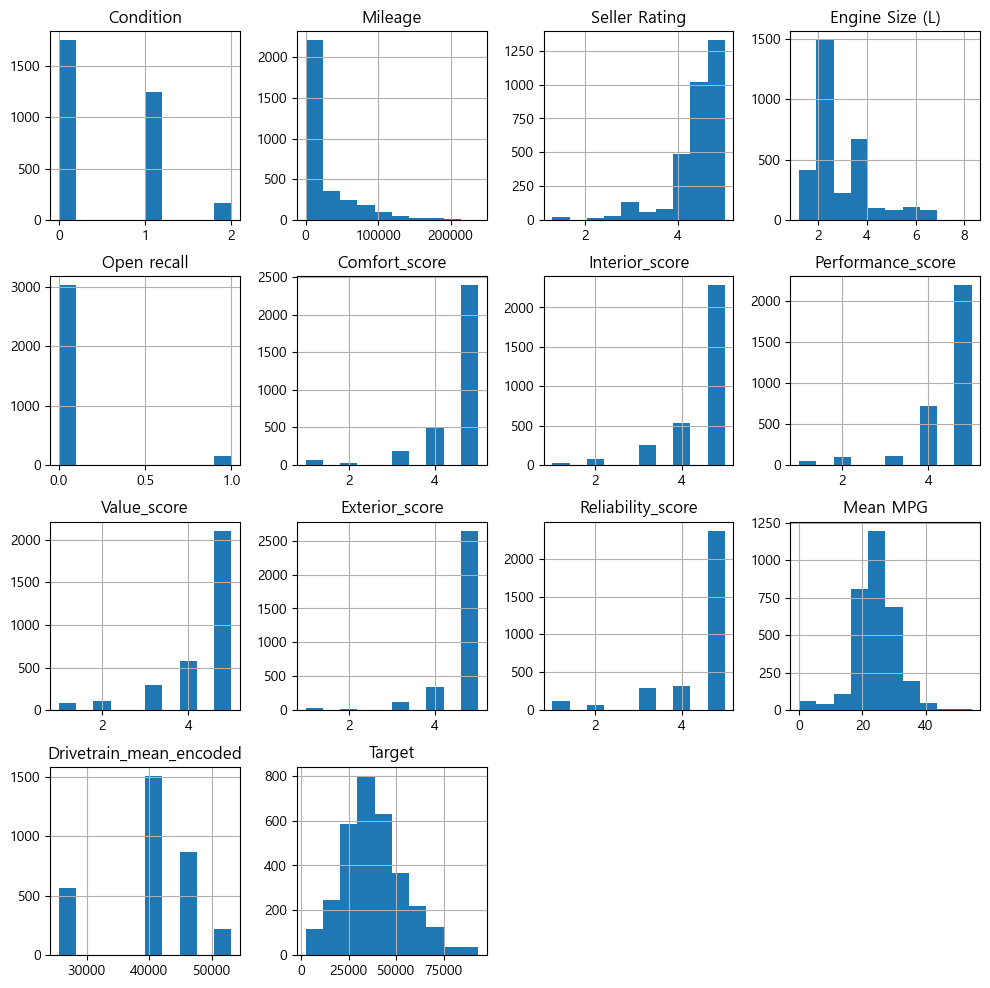

In [155]:
non_score_df2.hist(figsize=(12,12))

In [156]:
non_score_df2.corr()['Target'].sort_values(ascending=False)[1:]

Drivetrain_mean_encoded    0.342982
Engine Size (L)            0.316088
Seller Rating              0.203922
Performance_score          0.041490
Reliability_score          0.022815
Exterior_score            -0.009718
Comfort_score             -0.011146
Interior_score            -0.048819
Value_score               -0.052015
Open recall               -0.112147
Condition                 -0.208215
Mean MPG                  -0.341912
Mileage                   -0.521016
Name: Target, dtype: float64

In [157]:
non_score_df2['Total_score'] = \
non_score_df2['Seller Rating'] * 1.203922 + \
non_score_df2['Performance_score'] * 1.041490 + \
non_score_df2['Reliability_score'] * 1.022815 + \
non_score_df2['Exterior_score'] * 0.009718 + \
non_score_df2['Comfort_score'] * 0.011146 + \
non_score_df2['Interior_score'] * 0.048819 + \
non_score_df2['Value_score'] * 0.052015

In [158]:
drop_label = ['Seller Rating', 'Performance_score','Reliability_score','Exterior_score','Comfort_score','Interior_score','Value_score']

non_score_df3 = non_score_df2.drop(labels=drop_label, axis=1)
non_score_df3

,Condition,Mileage,Engine Size (L),Open recall,Mean MPG,Drivetrain_mean_encoded,Target,Total_score
0,1,65715.0,2.0,0,25.0,41648.667971,23999.0,15.241842
1,1,19830.0,2.0,0,0.0,41648.667971,39799.0,16.227272
2,1,110202.0,5.6,0,24.5,53170.221374,14985.0,13.156771
3,1,84358.0,2.0,1,29.0,41648.667971,13900.0,8.125059
4,1,33832.0,2.0,0,26.0,41648.667971,39990.0,16.818087
...,...,...,...,...,...,...,...,...
3164,0,10.0,2.0,0,28.0,46121.874007,32990.0,16.347664
3165,0,5.0,3.0,0,25.0,46121.874007,42995.0,16.347664
3166,0,6.0,2.5,0,29.5,41648.667971,33989.0,16.347664
3167,0,10.0,3.6,0,21.5,46121.874007,52301.0,15.745703


In [159]:
non_score_df3['target'] = non_score_df3.Target
non_score_df3.drop(labels=['Target'], axis=1, inplace=True)
non_score_df3

,Condition,Mileage,Engine Size (L),Open recall,Mean MPG,Drivetrain_mean_encoded,Total_score,target
0,1,65715.0,2.0,0,25.0,41648.667971,15.241842,23999.0
1,1,19830.0,2.0,0,0.0,41648.667971,16.227272,39799.0
2,1,110202.0,5.6,0,24.5,53170.221374,13.156771,14985.0
3,1,84358.0,2.0,1,29.0,41648.667971,8.125059,13900.0
4,1,33832.0,2.0,0,26.0,41648.667971,16.818087,39990.0
...,...,...,...,...,...,...,...,...
3164,0,10.0,2.0,0,28.0,46121.874007,16.347664,32990.0
3165,0,5.0,3.0,0,25.0,46121.874007,16.347664,42995.0
3166,0,6.0,2.5,0,29.5,41648.667971,16.347664,33989.0
3167,0,10.0,3.6,0,21.5,46121.874007,15.745703,52301.0


array([[<Axes: title={'center': 'Condition'}>,
        <Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Engine Size (L)'}>],
       [<Axes: title={'center': 'Open recall'}>,
        <Axes: title={'center': 'Mean MPG'}>,
        <Axes: title={'center': 'Drivetrain_mean_encoded'}>],
       [<Axes: title={'center': 'Total_score'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

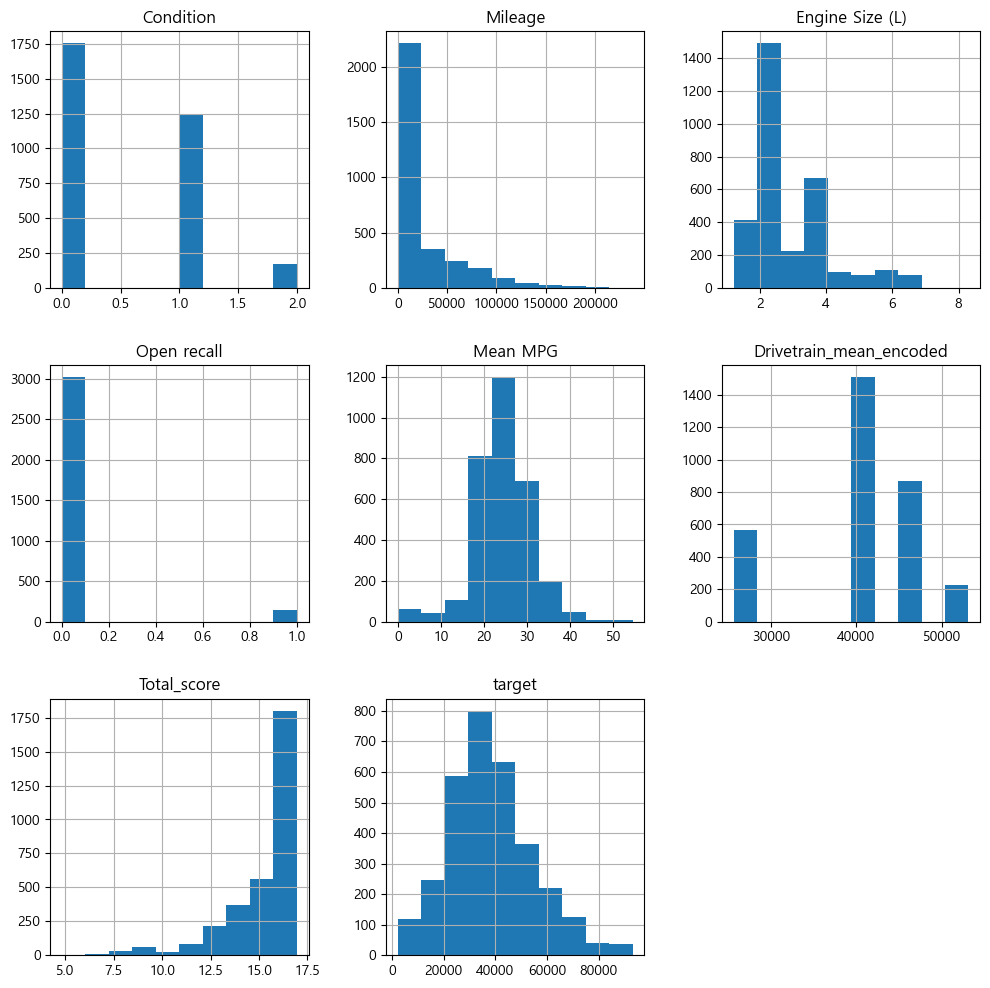

In [160]:
non_score_df3.hist(figsize=(12,12))

In [161]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = non_score_df3.iloc[:, :-1], non_score_df3.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 47293464.0870, RMSE: 6877.0244, R2: 0.8286
RandomForestRegressor
MSE: 32148382.2231, RMSE: 5669.9543, R2: 0.8835
GradientBoostingRegressor
MSE: 66680748.5259, RMSE: 8165.8281, R2: 0.7584
XGBRegressor
MSE: 29625538.0801, RMSE: 5442.9347, R2: 0.8927
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 2535, number of used features: 7
[LightGBM] [Info] Start training from score 38353.344773
LGBMRegressor
MSE: 37895347.6504, RMSE: 6155.9197, R2: 0.8627


In [162]:
from statsmodels.api import OLS

features, targets = non_score_df3.iloc[: ,:-1], non_score_df3.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              5371.
Date:                Fri, 10 May 2024   Prob (F-statistic):                        0.00
Time:                        01:21:45   Log-Likelihood:                         -34156.
No. Observations:                3169   AIC:                                  6.833e+04
Df Residuals:                    3162   BIC:                                  6.837e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [163]:
get_vif(features)

,vif_score,feature
0,2.468971,Condition
1,2.028192,Mileage
2,9.967278,Engine Size (L)
3,1.101148,Open recall
4,14.663418,Mean MPG
5,28.425007,Drivetrain_mean_encoded
6,44.481256,Total_score


In [164]:
non_score_df3.drop(labels=['Open recall'], axis=1, inplace=True)

In [165]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = non_score_df3.iloc[:, :-1], non_score_df3.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 44833093.4324, RMSE: 6695.7519, R2: 0.8376
RandomForestRegressor
MSE: 31992849.9016, RMSE: 5656.2222, R2: 0.8841
GradientBoostingRegressor
MSE: 65699993.2273, RMSE: 8105.5532, R2: 0.7620
XGBRegressor
MSE: 29581103.8683, RMSE: 5438.8513, R2: 0.8928
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 597
[LightGBM] [Info] Number of data points in the train set: 2535, number of used features: 6
[LightGBM] [Info] Start training from score 38353.344773
LGBMRegressor
MSE: 38113129.8367, RMSE: 6173.5832, R2: 0.8619


In [166]:
from statsmodels.api import OLS

features, targets = non_score_df3.iloc[: ,:-1], non_score_df3.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              6267.
Date:                Fri, 10 May 2024   Prob (F-statistic):                        0.00
Time:                        01:21:51   Log-Likelihood:                         -34156.
No. Observations:                3169   AIC:                                  6.832e+04
Df Residuals:                    3163   BIC:                                  6.836e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [167]:
get_vif(features)

,vif_score,feature
0,2.435069,Condition
1,2.006763,Mileage
2,9.966679,Engine Size (L)
3,14.660527,Mean MPG
4,28.408815,Drivetrain_mean_encoded
5,44.463504,Total_score


In [168]:
get_vif(features.drop(labels=['Total_score', 'Drivetrain_mean_encoded'], axis=1))

,vif_score,feature
0,2.412906,Condition
1,1.984842,Mileage
2,3.781691,Engine Size (L)
3,3.323393,Mean MPG


Cycle 5
- 다중공산성문제가 지속해서 발생한 것을 확인,
- Total_score와 Drivetrain_mean_encoded를 제거하고 다시 훈련해서 점수를 확인

In [169]:
non_score_df4 = non_score_df3.drop(labels=['Total_score', 'Drivetrain_mean_encoded'], axis=1)

In [170]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = non_score_df4.iloc[:, :-1], non_score_df4.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 46158778.2562, RMSE: 6794.0252, R2: 0.8328
RandomForestRegressor
MSE: 35995063.1073, RMSE: 5999.5886, R2: 0.8696
GradientBoostingRegressor
MSE: 68058715.0936, RMSE: 8249.7706, R2: 0.7534
XGBRegressor
MSE: 36162932.9053, RMSE: 6013.5624, R2: 0.8690
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 359
[LightGBM] [Info] Number of data points in the train set: 2535, number of used features: 4
[LightGBM] [Info] Start training from score 38353.344773
LGBMRegressor
MSE: 47626357.9029, RMSE: 6901.1853, R2: 0.8274


In [171]:
from statsmodels.api import OLS

features, targets = non_score_df4.iloc[: ,:-1], non_score_df4.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              6845.
Date:                Fri, 10 May 2024   Prob (F-statistic):                        0.00
Time:                        01:21:54   Log-Likelihood:                         -34614.
No. Observations:                3169   AIC:                                  6.924e+04
Df Residuals:                    3165   BIC:                                  6.926e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [172]:
get_vif(features)

,vif_score,feature
0,2.412906,Condition
1,1.984842,Mileage
2,3.781691,Engine Size (L)
3,3.323393,Mean MPG


Cycle 5 결과, 안정적인 점수와 다중공산성의 문제를 해결하였다.
- 교차훈련을 통해 과적합되었는지 안되었는지를 확인
- 제일 점수가 잘 나온 XGBoost 모델에 대해서 교차훈련 진행

In [173]:
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from xgboost import XGBRegressor

features, targets = non_score_df4.iloc[:, :-1], non_score_df4.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb = XGBRegressor()
kfold = KFold(n_splits=10, random_state=124, shuffle=True)

g_xgb = GridSearchCV(xgb, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold, n_jobs=-1)
# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
g_xgb.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=124, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    in...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             scoring='neg_mean_squared_error')

In [174]:
result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",-5.000320e+07,3
1,"{'learning_rate': 0.3, 'n_estimators': 100}",-4.796950e+07,1
2,"{'learning_rate': 0.3, 'n_estimators': 500}",-4.822446e+07,2
3,"{'learning_rate': 0.5, 'n_estimators': 50}",-5.094946e+07,5
4,"{'learning_rate': 0.5, 'n_estimators': 100}",-5.024308e+07,4
5,"{'learning_rate': 0.5, 'n_estimators': 500}",-5.102946e+07,6
6,"{'learning_rate': 0.7, 'n_estimators': 50}",-5.232858e+07,7
7,"{'learning_rate': 0.7, 'n_estimators': 100}",-5.237919e+07,8
8,"{'learning_rate': 0.7, 'n_estimators': 500}",-5.316252e+07,9
9,"{'learning_rate': 1, 'n_estimators': 50}",-5.881262e+07,10


In [175]:
xgb = g_xgb.best_estimator_
prediction = xgb.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 36162932.9053, RMSE: 6013.5624, R2: 0.8690


과적합인지 확인하기위해 교차훈련을 진행하였고 다음과 같이 결과가 나타났다.
- 교차훈련 진행전

<img src='./images/project_xgb_boost_score.png'>

- 교차훈련 진행후

<img src='./images/after_cross_validation_score.png'>

과적합의 문제가 발생하지 않았음을 확인할 수 있었다.

In [176]:
import pickle
import joblib

joblib.dump(xgb, './car.pkl')

['./car.pkl']

In [177]:
car_model = joblib.load('./car.pkl')
prediction = car_model.predict(X_test)
get_evaluation_msle(y_test, prediction)

MSE: 36162932.9053, RMSE: 6013.5624, MSLE: 0.0296, RMSLE: 0.1721, R2: 0.8690
